# Proyecto Final - Machine Learning
## Predicción de Valor de Cartas Pokémon TCG - Segundo Corte

**Estudiantes:** Cristian Arturo Paz Alvarez, Alonso Esteban Amaya Gil  
**Institución:** Facultad de Ingeniería, Universitaria Agustiniana  
**Profesor:** Juan Sebastián Martínez Conejo  
**Fecha:** Septiembre 2025  
**Curso:** Machine Learning  
**Corte:** Segundo Corte (30%)

---

## 📋 Índice del Segundo Corte

1. [Preprocesamiento Completo de Datos](#preprocesamiento-completo)
2. [Análisis Exploratorio de Datos (EDA)](#eda)
3. [Selección de Variables](#seleccion-variables)
4. [Modelos Supervisados](#modelos-supervisados)
5. [Modelo No Supervisado](#modelo-no-supervisado)
6. [Comparación de Resultados](#comparacion-resultados)
7. [Plan de Trabajo para Tercer Corte](#plan-tercer-corte)

---

## 🎯 SEGUNDO CORTE (30%)

### Objetivos del Segundo Corte:
- ✅ **Preprocesamiento completo** de la base de datos
- ✅ **Análisis exploratorio** con visualizaciones
- ✅ **Implementación de 2 modelos supervisados** y 1 no supervisado
- ✅ **Comparación de resultados** mediante métricas pertinentes
- ✅ **Plan de trabajo** para completar el resto de modelos

---

## 🔧 INSTRUCCIONES DE USO:

**Este notebook está diseñado para ejecutarse bloque por bloque.**
1. Ejecuta cada celda en orden secuencial
2. Revisa los resultados antes de continuar
3. Cada sección está claramente marcada
4. Los errores están manejados con try-except


## 1. Preprocesamiento Completo de Datos {#preprocesamiento-completo}

### 1.1 Configuración del Entorno y Carga de Librerías


In [38]:
# BLOQUE 1: Configuración del entorno y carga de librerías
print("🚀 INICIANDO SEGUNDO CORTE - MACHINE LEARNING")
print("=" * 60)

# Instalación de librerías necesarias
try:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
    from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
    from sklearn.metrics import precision_recall_curve, f1_score, accuracy_score
    import xgboost as xgb
    import warnings
    warnings.filterwarnings('ignore')
    print("✅ Todas las librerías ya instaladas")
except ImportError as e:
    print(f"❌ Librería faltante: {e}")
    print("🔧 Instalando librerías necesarias...")
    %pip install pandas numpy matplotlib seaborn scikit-learn xgboost

# Configuración de estilo para gráficos
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("✅ Entorno configurado exitosamente")
print(f"📊 Pandas: {pd.__version__}")
print(f"🔢 NumPy: {np.__version__}")
print(f"🤖 Scikit-learn disponible")
print(f"⚡ XGBoost disponible")


🚀 INICIANDO SEGUNDO CORTE - MACHINE LEARNING
✅ Todas las librerías ya instaladas
✅ Entorno configurado exitosamente
📊 Pandas: 1.5.3
🔢 NumPy: 1.23.5
🤖 Scikit-learn disponible
⚡ XGBoost disponible


### 1.2 Carga de Datos


In [39]:
# BLOQUE 2: Carga de datos
print("📂 CARGANDO DATOS PARA EL SEGUNDO CORTE")
print("=" * 50)

import os

# Verificar archivos disponibles
data_dir = "ptcg_data"
if os.path.exists(data_dir):
    files = os.listdir(data_dir)
    print(f"📁 Archivos disponibles en {data_dir}:")
    for file in files:
        size_mb = os.path.getsize(os.path.join(data_dir, file)) / 1024**2
        print(f"   - {file} ({size_mb:.1f} MB)")
else:
    print("⚠️ Directorio de datos no encontrado")

# Cargar dataset principal
try:
    df = pd.read_csv(os.path.join(data_dir, "ptcg_master_clean.csv"))
    print(f"\n✅ Dataset maestro cargado: {df.shape}")
    print(f"📊 Memoria utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
    
    # Mostrar información básica
    print(f"\n📋 Información del dataset:")
    print(f"   - Filas: {df.shape[0]:,}")
    print(f"   - Columnas: {df.shape[1]}")
    print(f"   - Columnas numéricas: {len(df.select_dtypes(include=[np.number]).columns)}")
    print(f"   - Columnas categóricas: {len(df.select_dtypes(include=['object']).columns)}")
    
except FileNotFoundError:
    print("❌ Error: Archivo ptcg_master_clean.csv no encontrado")
    print("🔧 Ejecuta primero el script de descarga de datos")
    df = None


📂 CARGANDO DATOS PARA EL SEGUNDO CORTE
📁 Archivos disponibles en ptcg_data:
   - ptcg_clean.csv (6.4 MB)
   - ptcg_clean.parquet (1.1 MB)
   - ptcg_features.csv (12.0 MB)
   - ptcg_features.parquet (0.9 MB)
   - ptcg_master_clean.csv (5.9 MB)
   - ptcg_nulls_summary.csv (0.0 MB)
   - ptcg_test.parquet (0.3 MB)
   - ptcg_train.parquet (1.0 MB)

✅ Dataset maestro cargado: (19500, 54)
📊 Memoria utilizada: 29.2 MB

📋 Información del dataset:
   - Filas: 19,500
   - Columnas: 54
   - Columnas numéricas: 32
   - Columnas categóricas: 22


### 1.3 Definición de Variable Objetivo y Limpieza Inicial


In [40]:
# BLOQUE 3: Definición de variable objetivo y limpieza inicial
print("🎯 DEFINICIÓN DE VARIABLE OBJETIVO Y LIMPIEZA")
print("=" * 50)

if df is not None:
    # Definir variable objetivo usando percentil 95
    price_column = 'tcg_market_max'
    
    if price_column in df.columns:
        # Filtrar valores válidos
        price_data = df[price_column].dropna()
        p95 = np.percentile(price_data, 95)
        
        # Crear variable objetivo binaria
        df['carta_cara'] = (df[price_column] >= p95).astype(int)
        
        print(f"✅ Variable objetivo creada:")
        print(f"   - Umbral (percentil 95): ${p95:.2f}")
        print(f"   - Cartas 'de alto valor' (≥ p95): {df['carta_cara'].sum():,}")
        print(f"   - Cartas 'de valor regular' (< p95): {(df['carta_cara'] == 0).sum():,}")
        
        # Análisis de desbalance
        balance_ratio = (df['carta_cara'] == 0).sum() / df['carta_cara'].sum()
        print(f"   - Ratio de desbalance: {balance_ratio:.1f}:1")
        
    else:
        print(f"❌ Columna de precio '{price_column}' no encontrada")
    
    # Análisis de valores faltantes
    print(f"\n❌ ANÁLISIS DE VALORES FALTANTES:")
    null_counts = df.isnull().sum()
    null_pct = (null_counts / len(df) * 100).round(2)
    
    # Mostrar top 10 columnas con más nulos
    null_summary = pd.DataFrame({
        'Columna': null_counts.index,
        'Valores_Nulos': null_counts.values,
        'Porcentaje_Nulos': null_pct.values
    }).sort_values('Porcentaje_Nulos', ascending=False)
    
    print("📊 Top 10 columnas con más valores nulos:")
    display(null_summary.head(10))
    
    # Estadísticas generales
    total_nulls = null_counts.sum()
    total_cells = len(df) * len(df.columns)
    print(f"\n📈 Estadísticas generales:")
    print(f"   - Total de valores nulos: {total_nulls:,}")
    print(f"   - Porcentaje general de nulos: {(total_nulls/total_cells*100):.2f}%")
    
else:
    print("❌ No se puede continuar sin datos")


🎯 DEFINICIÓN DE VARIABLE OBJETIVO Y LIMPIEZA
✅ Variable objetivo creada:
   - Umbral (percentil 95): $69.67
   - Cartas 'de alto valor' (≥ p95): 961
   - Cartas 'de valor regular' (< p95): 18,539
   - Ratio de desbalance: 19.3:1

❌ ANÁLISIS DE VALORES FALTANTES:
📊 Top 10 columnas con más valores nulos:


,Columna,Valores_Nulos,Porcentaje_Nulos
4,level,17096,87.67
9,rules,13567,69.57
25,set.legalities.standard,13239,67.89
16,legalities.standard,13106,67.21
8,evolvesTo,13073,67.04
7,evolvesFrom,12489,64.05
39,tcg_directLow_max,12311,63.13
26,set.legalities.expanded,5751,29.49
17,legalities.expanded,5515,28.28
29,avg_damage,3971,20.36



📈 Estadísticas generales:
   - Total de valores nulos: 140,390
   - Porcentaje general de nulos: 13.09%


## 2. Análisis Exploratorio de Datos (EDA) {#eda}

### 2.1 Análisis de la Variable Objetivo


📊 ANÁLISIS EXPLORATORIO DE LA VARIABLE OBJETIVO
📈 Distribución de clases:
   - No Alto Valor: 18,539 (95.1%)
   - Alto Valor: 961 (4.9%)

💰 Estadísticas de precios por clase:
            count    mean  median     std
carta_cara                               
0           18243    6.25    1.43   11.47
1             961  215.03  136.18  308.34


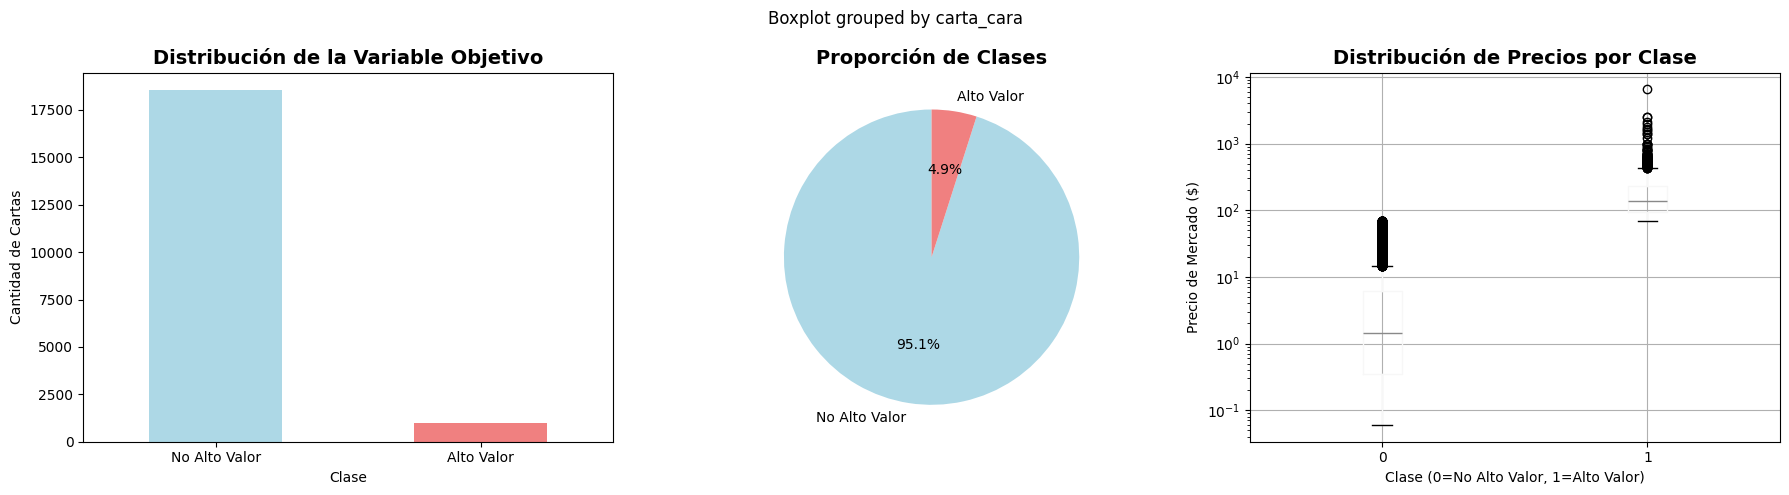


✅ Análisis de variable objetivo completado


In [41]:
# BLOQUE 4: Análisis exploratorio de la variable objetivo
print("📊 ANÁLISIS EXPLORATORIO DE LA VARIABLE OBJETIVO")
print("=" * 60)

if df is not None and 'carta_cara' in df.columns:
    # Estadísticas de la variable objetivo
    target_counts = df['carta_cara'].value_counts()
    
    print("📈 Distribución de clases:")
    for class_val, count in target_counts.items():
        class_name = "Alto Valor" if class_val == 1 else "No Alto Valor"
        pct = count / len(df) * 100
        print(f"   - {class_name}: {count:,} ({pct:.1f}%)")
    
    # Visualización de la variable objetivo
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Gráfico de barras
    target_counts.plot(kind='bar', ax=axes[0], color=['lightblue', 'lightcoral'])
    axes[0].set_title('Distribución de la Variable Objetivo', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Clase')
    axes[0].set_ylabel('Cantidad de Cartas')
    axes[0].set_xticklabels(['No Alto Valor', 'Alto Valor'], rotation=0)
    
    # Gráfico de pastel
    axes[1].pie(target_counts.values, labels=['No Alto Valor', 'Alto Valor'], autopct='%1.1f%%', 
                colors=['lightblue', 'lightcoral'], startangle=90)
    axes[1].set_title('Proporción de Clases', fontsize=14, fontweight='bold')
    
    # Análisis de precios por clase
    if 'tcg_market_max' in df.columns:
        df_with_price = df.dropna(subset=['tcg_market_max', 'carta_cara'])
        
        # Box plot de precios por clase
        df_with_price.boxplot(column='tcg_market_max', by='carta_cara', ax=axes[2])
        axes[2].set_title('Distribución de Precios por Clase', fontsize=14, fontweight='bold')
        axes[2].set_xlabel('Clase (0=No Alto Valor, 1=Alto Valor)')
        axes[2].set_ylabel('Precio de Mercado ($)')
        axes[2].set_yscale('log')
        
        # Estadísticas de precios por clase
        print(f"\n💰 Estadísticas de precios por clase:")
        price_stats = df_with_price.groupby('carta_cara')['tcg_market_max'].agg(['count', 'mean', 'median', 'std'])
        print(price_stats.round(2))
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n✅ Análisis de variable objetivo completado")
    
else:
    print("❌ Variable objetivo no disponible para análisis")


### 2.2 Análisis de Variables Categóricas


📊 ANÁLISIS DE VARIABLES CATEGÓRICAS
📋 Variables categóricas analizadas: ['supertype', 'rarity', 'set.series', 'types']

📈 Top 5 categorías en supertype:
   1. Pokémon: 16,491 (84.6%)
   2. Trainer: 2,626 (13.5%)
   3. Energy: 383 (2.0%)

📈 Top 5 categorías en rarity:
   1. Common: 5,013 (25.7%)
   2. Uncommon: 4,669 (23.9%)
   3. Rare: 2,481 (12.7%)
   4. Rare Holo: 1,617 (8.3%)
   5. Promo: 1,255 (6.4%)

📈 Top 5 categorías en set.series:
   1. Sword & Shield: 3,667 (18.8%)
   2. Scarlet & Violet: 3,630 (18.6%)
   3. Sun & Moon: 2,973 (15.2%)
   4. XY: 1,926 (9.9%)
   5. EX: 1,766 (9.1%)

📈 Top 5 categorías en types:
   1. Water: 2,332 (12.0%)
   2. Grass: 2,285 (11.7%)
   3. Psychic: 2,218 (11.4%)
   4. Colorless: 2,096 (10.7%)
   5. Fighting: 1,785 (9.2%)


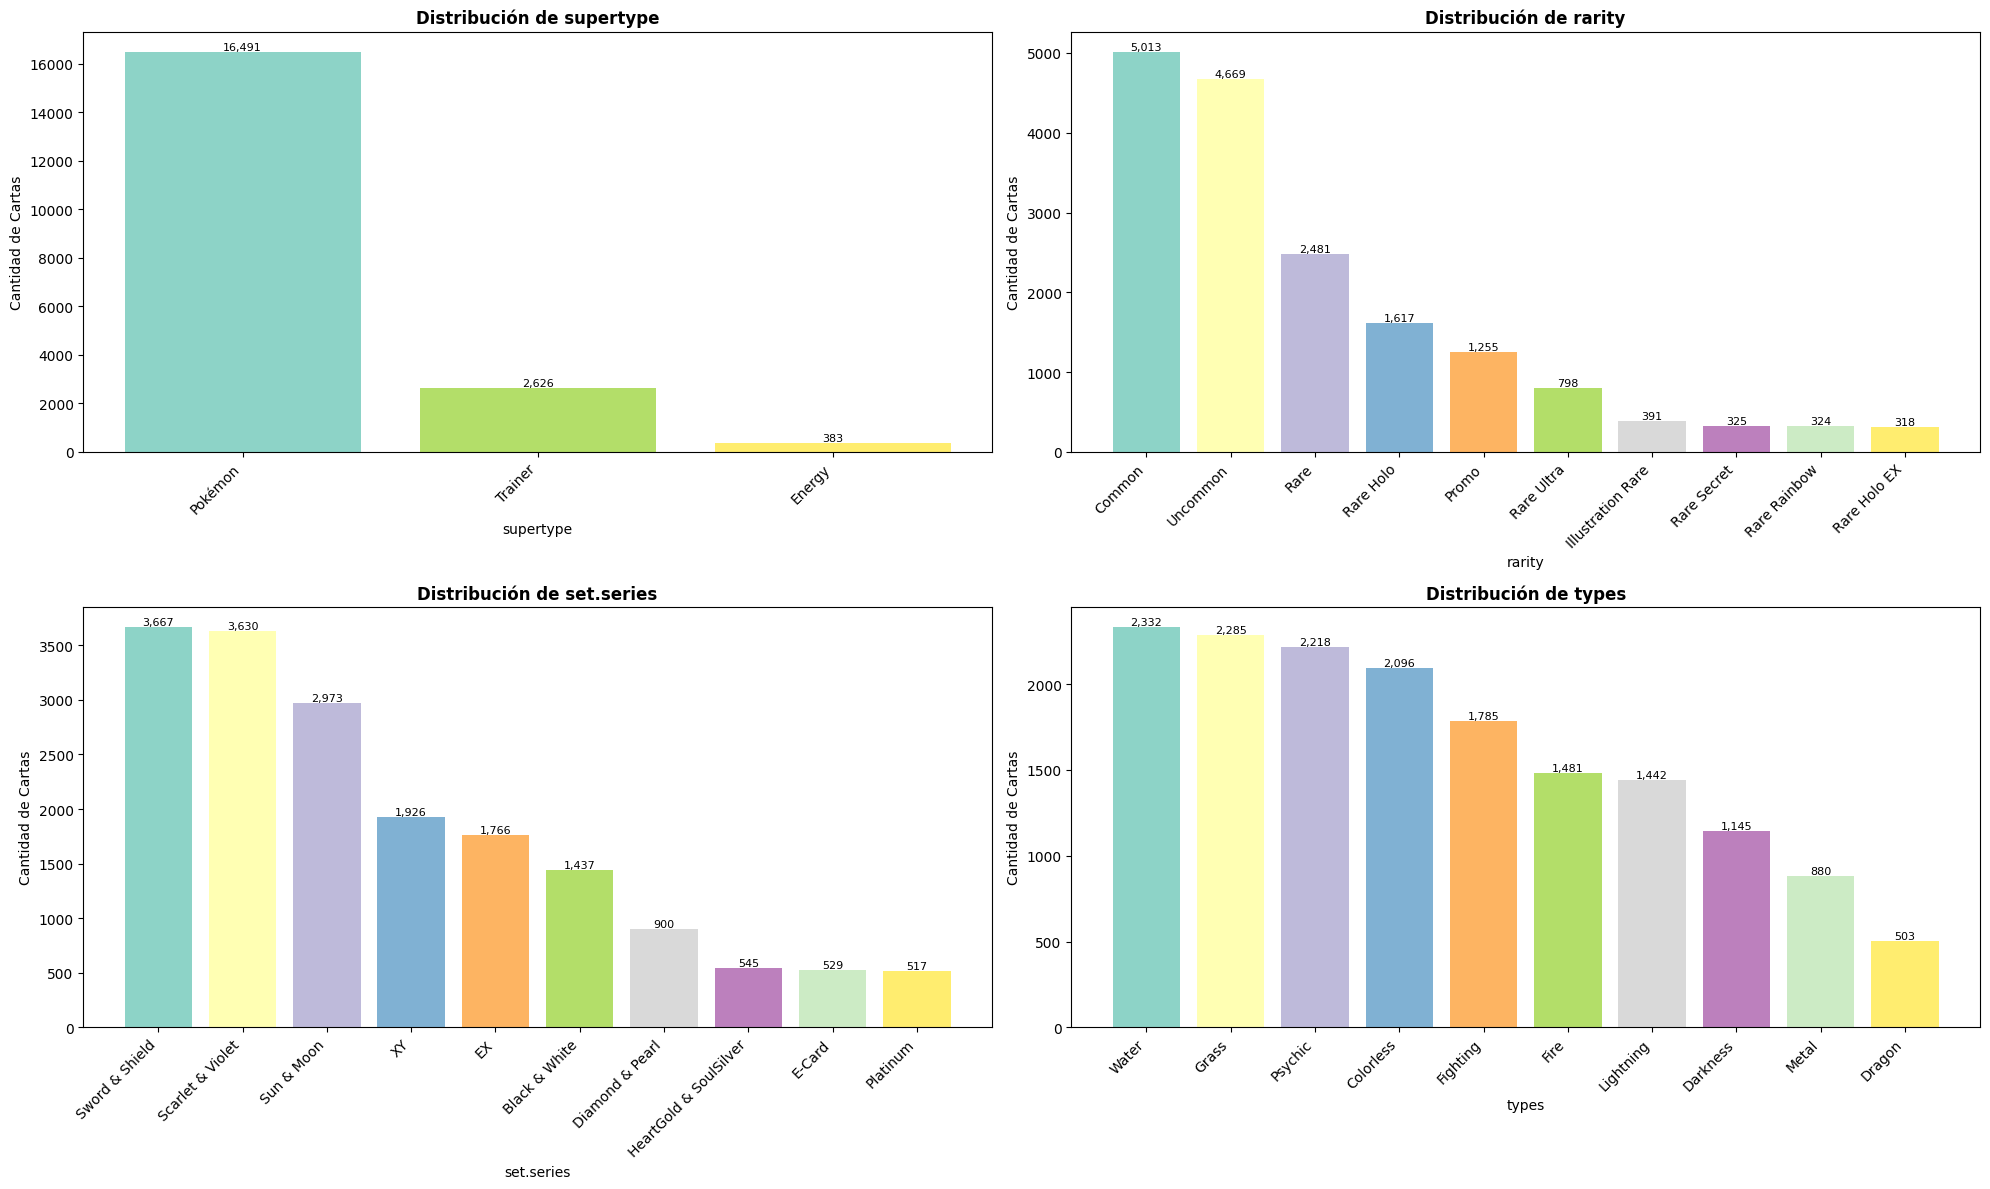


🎯 ANÁLISIS DE RELACIÓN CON VARIABLE OBJETIVO:

📊 supertype:
carta_cara     0    1
supertype            
Pokémon     94.5  5.5
Trainer     97.9  2.1
Energy      99.0  1.0

📊 rarity:
carta_cara                     0      1
rarity                                 
Black White Rare             0.0  100.0
LEGEND                       0.0  100.0
Rare Holo Star              12.0   88.0
Rare Shining                31.2   68.8
Rare Holo LV.X              66.1   33.9
Rare Holo EX                69.2   30.8
Rare Secret                 74.5   25.5
Special Illustration Rare   76.0   24.0
Rare Prime                  76.9   23.1
Rare Ultra                  82.3   17.7
Rare Holo                   84.5   15.5
Rare Shiny GX               85.7   14.3
Rare Rainbow                86.7   13.3
Classic Collection          92.0    8.0
Promo                       94.0    6.0
Rare Holo GX                96.4    3.6
Rare Holo VMAX              96.4    3.6
Rare                        97.5    2.5
Rare Holo VSTAR   

In [42]:
# BLOQUE 5: Análisis de variables categóricas
print("📊 ANÁLISIS DE VARIABLES CATEGÓRICAS")
print("=" * 50)

if df is not None:
    # Identificar variables categóricas importantes
    categorical_vars = ['supertype', 'rarity', 'set.series', 'types']
    
    # Filtrar variables que existen en el dataset
    available_cats = [var for var in categorical_vars if var in df.columns]
    
    if available_cats:
        print(f"📋 Variables categóricas analizadas: {available_cats}")
        
        # Crear visualizaciones
        n_vars = len(available_cats)
        fig, axes = plt.subplots(2, 2, figsize=(20, 12))
        axes = axes.ravel()
        
        for i, var in enumerate(available_cats):
            if i < 4:  # Máximo 4 gráficos
                # Análisis de distribución
                value_counts = df[var].value_counts().head(10)
                
                # Gráfico de barras
                bars = axes[i].bar(range(len(value_counts)), value_counts.values, 
                                  color=plt.cm.Set3(np.linspace(0, 1, len(value_counts))))
                axes[i].set_title(f'Distribución de {var}', fontsize=12, fontweight='bold')
                axes[i].set_xlabel(var)
                axes[i].set_ylabel('Cantidad de Cartas')
                axes[i].set_xticks(range(len(value_counts)))
                axes[i].set_xticklabels(value_counts.index, rotation=45, ha='right')
                
                # Agregar valores en las barras
                for j, bar in enumerate(bars):
                    height = bar.get_height()
                    axes[i].text(bar.get_x() + bar.get_width()/2., height,
                                f'{int(height):,}', ha='center', va='bottom', fontsize=8)
                
                print(f"\n📈 Top 5 categorías en {var}:")
                for j, (cat, count) in enumerate(value_counts.head(5).items(), 1):
                    pct = count / len(df) * 100
                    print(f"   {j}. {cat}: {count:,} ({pct:.1f}%)")
        
        # Ocultar subplots no utilizados
        for i in range(len(available_cats), 4):
            axes[i].set_visible(False)
        
        plt.tight_layout()
        plt.show()
        
        # Análisis de relación con variable objetivo
        print(f"\n🎯 ANÁLISIS DE RELACIÓN CON VARIABLE OBJETIVO:")
        if 'carta_cara' in df.columns:
            for var in available_cats[:2]:  # Analizar solo las 2 primeras
                if var in df.columns:
                    print(f"\n📊 {var}:")
                    crosstab = pd.crosstab(df[var], df['carta_cara'], normalize='index') * 100
                    crosstab = crosstab.sort_values(1, ascending=False)
                    print(crosstab.round(1))
        
    else:
        print("❌ No se encontraron variables categóricas para analizar")
        
else:
    print("❌ No se puede continuar sin datos")


### 2.3 Análisis de Variables Numéricas y Correlaciones


📊 ANÁLISIS DE VARIABLES NUMÉRICAS Y CORRELACIONES
📋 Variables numéricas identificadas: 32
🔢 Variables numéricas relevantes: 32

🎯 TOP 10 CORRELACIONES CON VARIABLE OBJETIVO:
    1. tcg_market_max: 0.5460
    2. cm_reverseHoloAvg30: 0.4583
    3. cm_reverseHoloAvg7: 0.4074
    4. cm_avg30: 0.3734
    5. cm_reverseHoloTrend: 0.3358
    6. cm_avg7: 0.3247
    7. cm_trendPrice: 0.3199
    8. cm_avg1: 0.2840
    9. cm_averageSellPrice: 0.2345
   10. cm_reverseHoloAvg1: 0.2189


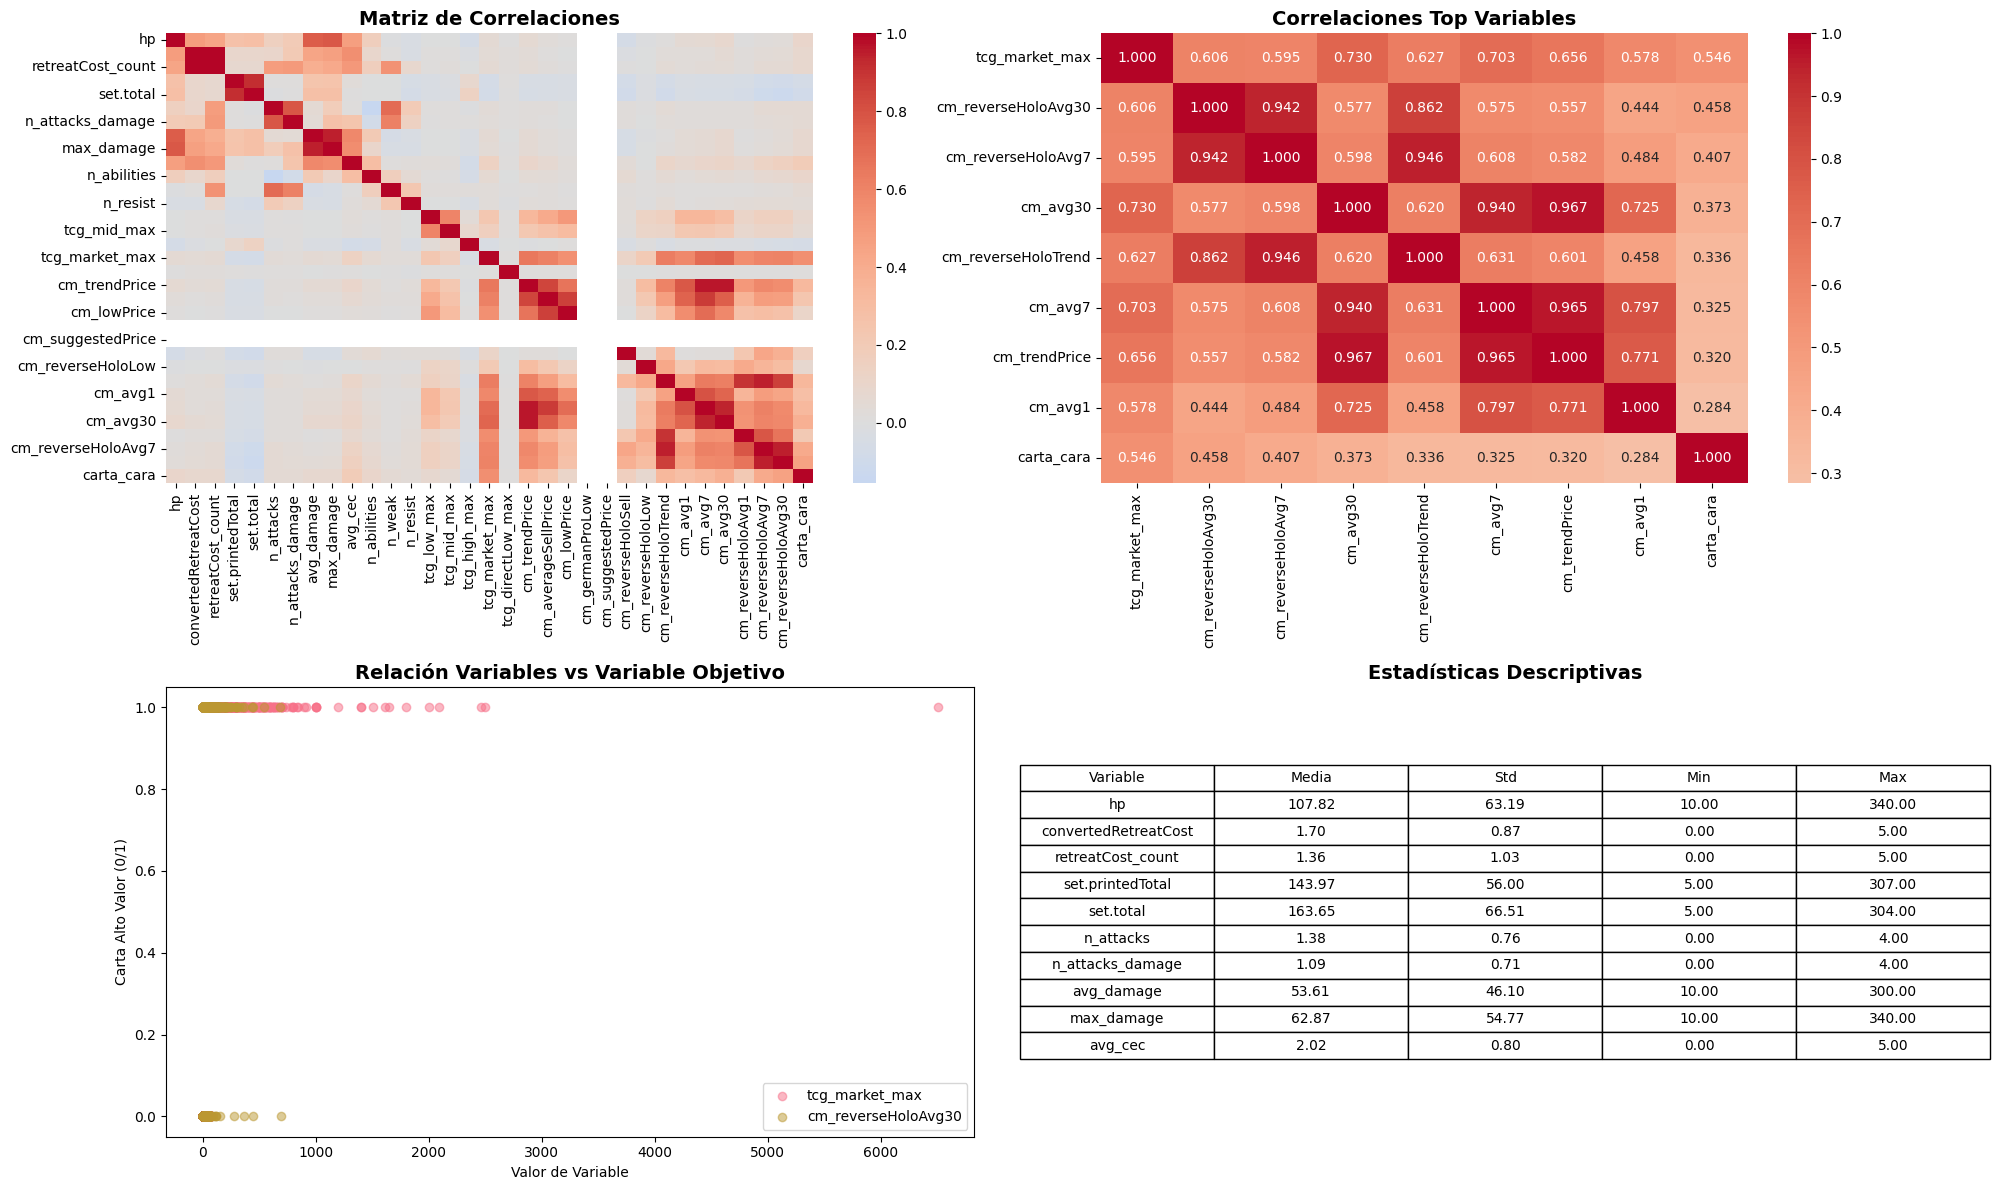


✅ Análisis de variables numéricas completado


In [43]:
# BLOQUE 6: Análisis de variables numéricas y correlaciones
print("📊 ANÁLISIS DE VARIABLES NUMÉRICAS Y CORRELACIONES")
print("=" * 60)

if df is not None:
    # Identificar variables numéricas
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    # Filtrar variables numéricas relevantes (excluir IDs y variables objetivo)
    exclude_cols = ['carta_cara']  # Mantener carta_cara para correlación
    relevant_numeric = [col for col in numeric_cols if col not in exclude_cols]
    
    print(f"📋 Variables numéricas identificadas: {len(relevant_numeric)}")
    print(f"🔢 Variables numéricas relevantes: {len([col for col in relevant_numeric if col != 'carta_cara'])}")
    
    # Análisis de correlaciones con variable objetivo
    if 'carta_cara' in df.columns and len(relevant_numeric) > 1:
        # Calcular correlaciones
        correlation_with_target = df[relevant_numeric + ['carta_cara']].corr()['carta_cara'].abs().sort_values(ascending=False)
        
        # Mostrar top 10 correlaciones
        print(f"\n🎯 TOP 10 CORRELACIONES CON VARIABLE OBJETIVO:")
        top_correlations = correlation_with_target.head(11)[1:]  # Excluir la correlación consigo misma
        for i, (var, corr) in enumerate(top_correlations.items(), 1):
            print(f"   {i:2d}. {var}: {corr:.4f}")
        
        # Visualización de correlaciones
        fig, axes = plt.subplots(2, 2, figsize=(20, 12))
        
        # 1. Heatmap de correlaciones
        corr_matrix = df[relevant_numeric + ['carta_cara']].corr()
        sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, ax=axes[0, 0])
        axes[0, 0].set_title('Matriz de Correlaciones', fontsize=14, fontweight='bold')
        
        # 2. Top correlaciones con variable objetivo
        top_vars = top_correlations.head(8).index.tolist()
        corr_subset = corr_matrix.loc[top_vars + ['carta_cara'], top_vars + ['carta_cara']]
        sns.heatmap(corr_subset, annot=True, cmap='coolwarm', center=0, ax=axes[0, 1], fmt='.3f')
        axes[0, 1].set_title('Correlaciones Top Variables', fontsize=14, fontweight='bold')
        
        # 3. Distribución de variables más correlacionadas
        if len(top_vars) >= 2:
            for i, var in enumerate(top_vars[:2]):
                if var in df.columns:
                    df_clean = df.dropna(subset=[var, 'carta_cara'])
                    if len(df_clean) > 0:
                        axes[1, 0].scatter(df_clean[var], df_clean['carta_cara'], alpha=0.5, label=var)
            axes[1, 0].set_xlabel('Valor de Variable')
            axes[1, 0].set_ylabel('Carta Alto Valor (0/1)')
            axes[1, 0].set_title('Relación Variables vs Variable Objetivo', fontsize=14, fontweight='bold')
            axes[1, 0].legend()
        
        # 4. Estadísticas descriptivas de variables numéricas
        numeric_stats = df[relevant_numeric[:10]].describe()  # Solo las primeras 10
        axes[1, 1].axis('off')
        table_data = []
        for col in numeric_stats.columns:
            table_data.append([col, 
                             f"{numeric_stats.loc['mean', col]:.2f}",
                             f"{numeric_stats.loc['std', col]:.2f}",
                             f"{numeric_stats.loc['min', col]:.2f}",
                             f"{numeric_stats.loc['max', col]:.2f}"])
        
        table = axes[1, 1].table(cellText=table_data,
                            colLabels=['Variable', 'Media', 'Std', 'Min', 'Max'],
                            cellLoc='center',
                            loc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1.2, 1.5)
        axes[1, 1].set_title('Estadísticas Descriptivas', fontsize=14, fontweight='bold')
        
        plt.tight_layout()
        plt.show()
        
        print(f"\n✅ Análisis de variables numéricas completado")
        
    else:
        print("❌ No se puede realizar análisis de correlaciones")
        
else:
    print("❌ No se puede continuar sin datos")


## 3. Selección de Variables {#seleccion-variables}

### 3.1 Preparación de Features y Limpieza de Datos


In [44]:
# BLOQUE 7: Preparación de features y limpieza de datos
print("🔧 PREPARACIÓN DE FEATURES Y LIMPIEZA DE DATOS")
print("=" * 60)

if df is not None:
    print("📋 Paso 1: Identificación de variables candidatas")
    
    # Identificar variables numéricas para features
    numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
    numeric_features = [col for col in numeric_features if col != 'carta_cara']
    
    # Identificar variables categóricas importantes
    categorical_features = ['supertype', 'rarity', 'set.series', 'types']
    categorical_features = [col for col in categorical_features if col in df.columns]
    
    print(f"   - Variables numéricas candidatas: {len(numeric_features)}")
    print(f"   - Variables categóricas candidatas: {len(categorical_features)}")
    
    # Crear dataset de trabajo
    df_work = df.copy()
    
    print(f"\n📋 Paso 2: Manejo de valores faltantes")
    
    # Manejo de valores faltantes en variables numéricas
    for col in numeric_features:
        if df_work[col].isnull().sum() > 0:
            # Imputar con la mediana
            median_val = df_work[col].median()
            df_work[col].fillna(median_val, inplace=True)
            print(f"   - {col}: {df_work[col].isnull().sum()} nulos imputados con mediana ({median_val:.2f})")
    
    # Manejo de valores faltantes en variables categóricas
    for col in categorical_features:
        if df_work[col].isnull().sum() > 0:
            # Imputar con la moda
            mode_val = df_work[col].mode()[0] if not df_work[col].mode().empty else 'Unknown'
            df_work[col].fillna(mode_val, inplace=True)
            print(f"   - {col}: {df_work[col].isnull().sum()} nulos imputados con moda ({mode_val})")
    
    print(f"\n📋 Paso 3: Ingeniería de características")
    
    # Crear nuevas features numéricas
    new_features = {}
    
    # Features de rareza (encoding ordinal)
    if 'rarity' in df_work.columns:
        rarity_order = {
            'Common': 1, 'Uncommon': 2, 'Rare': 3, 'Rare Holo': 4,
            'Rare Holo EX': 5, 'Rare Holo GX': 6, 'Rare Holo V': 7,
            'Rare Holo VMAX': 8, 'Rare Holo Star': 9, 'Rare Shining': 10
        }
        df_work['rarity_numeric'] = df_work['rarity'].map(rarity_order).fillna(0)
        new_features['rarity_numeric'] = 'Rareza codificada numéricamente'
    
    # Features de supertipo (encoding)
    if 'supertype' in df_work.columns:
        supertype_dummies = pd.get_dummies(df_work['supertype'], prefix='supertype')
        for col in supertype_dummies.columns:
            df_work[col] = supertype_dummies[col]
            new_features[col] = f'Supertipo: {col.split("_")[1]}'
    
    # Features de tipos (encoding)
    if 'types' in df_work.columns:
        # Contar número de tipos
        df_work['n_types'] = df_work['types'].apply(lambda x: len(str(x).split(';')) if pd.notna(x) else 0)
        new_features['n_types'] = 'Número de tipos de energía'
    
    print(f"   - Nuevas features creadas: {len(new_features)}")
    for feature, desc in new_features.items():
        print(f"     * {feature}: {desc}")
    
    # Actualizar lista de features numéricas
    all_numeric_features = numeric_features + list(new_features.keys())
    
    print(f"\n📋 Paso 4: Selección final de variables")
    
    # Filtrar variables con varianza mínima
    low_variance_vars = []
    for col in all_numeric_features:
        if col in df_work.columns:
            if df_work[col].var() < 0.01:  # Varianza muy baja
                low_variance_vars.append(col)
    
    # Remover variables de baja varianza
    selected_numeric_features = [col for col in all_numeric_features if col not in low_variance_vars]
    
    print(f"   - Variables numéricas seleccionadas: {len(selected_numeric_features)}")
    print(f"   - Variables removidas por baja varianza: {len(low_variance_vars)}")
    
    if low_variance_vars:
        print(f"     Variables removidas: {low_variance_vars[:5]}...")  # Mostrar solo las primeras 5
    
    # Seleccionar variables categóricas con cardinalidad manejable
    selected_categorical_features = []
    for col in categorical_features:
        if col in df_work.columns:
            unique_vals = df_work[col].nunique()
            if unique_vals <= 20:  # Máximo 20 categorías únicas
                selected_categorical_features.append(col)
                print(f"   - {col}: {unique_vals} categorías únicas ✅")
            else:
                print(f"   - {col}: {unique_vals} categorías únicas ❌ (demasiadas)")
    
    print(f"\n✅ Preparación de features completada")
    print(f"   - Features numéricas finales: {len(selected_numeric_features)}")
    print(f"   - Features categóricas finales: {len(selected_categorical_features)}")
    
else:
    print("❌ No se puede continuar sin datos")


🔧 PREPARACIÓN DE FEATURES Y LIMPIEZA DE DATOS
📋 Paso 1: Identificación de variables candidatas
   - Variables numéricas candidatas: 32
   - Variables categóricas candidatas: 4

📋 Paso 2: Manejo de valores faltantes
   - hp: 0 nulos imputados con mediana (90.00)
   - convertedRetreatCost: 0 nulos imputados con mediana (1.00)
   - avg_damage: 0 nulos imputados con mediana (40.00)
   - max_damage: 0 nulos imputados con mediana (40.00)
   - avg_cec: 0 nulos imputados con mediana (2.00)
   - tcg_low_max: 0 nulos imputados con mediana (0.83)
   - tcg_mid_max: 0 nulos imputados con mediana (1.64)
   - tcg_high_max: 0 nulos imputados con mediana (10.99)
   - tcg_market_max: 0 nulos imputados con mediana (1.65)
   - tcg_directLow_max: 0 nulos imputados con mediana (0.74)
   - cm_trendPrice: 0 nulos imputados con mediana (0.64)
   - cm_averageSellPrice: 0 nulos imputados con mediana (0.62)
   - cm_lowPrice: 0 nulos imputados con mediana (0.05)
   - cm_germanProLow: 0 nulos imputados con mediana 

### 3.2 División de Datos y Preparación Final


In [45]:
# BLOQUE 8: División de datos y preparación final
print("📊 DIVISIÓN DE DATOS Y PREPARACIÓN FINAL")
print("=" * 50)

if 'df_work' in locals() and df_work is not None:
    print("📋 Paso 1: Preparación del dataset final")
    
    # Seleccionar features finales
    final_features = selected_numeric_features + selected_categorical_features
    
    # Crear dataset con features seleccionadas
    X = df_work[final_features].copy()
    y = df_work['carta_cara'].copy()
    
    print(f"   - Features seleccionadas: {len(final_features)}")
    print(f"   - Filas en dataset: {len(X):,}")
    print(f"   - Variable objetivo balance: {y.sum():,} positivos / {len(y)-y.sum():,} negativos")
    
    print(f"\n📋 Paso 2: Codificación de variables categóricas")
    
    # Codificar variables categóricas
    le_dict = {}
    for col in selected_categorical_features:
        if col in X.columns:
            le = LabelEncoder()
            X[col] = le.fit_transform(X[col].astype(str))
            le_dict[col] = le
            print(f"   - {col}: codificada con LabelEncoder ({X[col].nunique()} categorías)")
    
    print(f"\n📋 Paso 3: División train/test")
    
    # Dividir datos
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    print(f"   - Datos de entrenamiento: {X_train.shape}")
    print(f"   - Datos de prueba: {X_test.shape}")
    print(f"   - Balance en train: {y_train.sum():,} / {len(y_train)-y_train.sum():,}")
    print(f"   - Balance en test: {y_test.sum():,} / {len(y_test)-y_test.sum():,}")
    
    print(f"\n📋 Paso 4: Escalado de variables")
    
    # Escalar variables numéricas
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    print(f"   - Variables escaladas: {X_train_scaled.shape[1]}")
    print(f"   - Media de variables escaladas: {X_train_scaled.mean(axis=0).mean():.6f}")
    print(f"   - Desviación estándar: {X_train_scaled.std(axis=0).mean():.6f}")
    
    print(f"\n✅ Preparación de datos completada")
    print(f"   - Datos listos para modelado")
    print(f"   - Features finales: {len(final_features)}")
    
else:
    print("❌ No se puede continuar: df_work no disponible")
    print("🔧 Ejecuta primero el bloque anterior")


📊 DIVISIÓN DE DATOS Y PREPARACIÓN FINAL
📋 Paso 1: Preparación del dataset final
   - Features seleccionadas: 36
   - Filas en dataset: 19,500
   - Variable objetivo balance: 961 positivos / 18,539 negativos

📋 Paso 2: Codificación de variables categóricas
   - supertype: codificada con LabelEncoder (3 categorías)
   - set.series: codificada con LabelEncoder (16 categorías)

📋 Paso 3: División train/test
   - Datos de entrenamiento: (15600, 36)
   - Datos de prueba: (3900, 36)
   - Balance en train: 769 / 14,831
   - Balance en test: 192 / 3,708

📋 Paso 4: Escalado de variables
   - Variables escaladas: 36
   - Media de variables escaladas: 0.000000
   - Desviación estándar: 1.000000

✅ Preparación de datos completada
   - Datos listos para modelado
   - Features finales: 36


## 4. Modelos Supervisados {#modelos-supervisados}

### 4.1 Función de Evaluación de Modelos


In [46]:
# BLOQUE 9: Función de evaluación de modelos
print("🎯 FUNCIÓN DE EVALUACIÓN DE MODELOS")
print("=" * 40)

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """
    Función para evaluar modelos de clasificación con múltiples métricas
    """
    # Entrenar modelo
    model.fit(X_train, y_train)
    
    # Predicciones
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Métricas
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    
    results = {
        'Modelo': model_name,
        'Accuracy': accuracy,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'CV-AUC-Mean': cv_scores.mean(),
        'CV-AUC-Std': cv_scores.std()
    }
    
    return results, y_pred, y_pred_proba

def plot_model_results(results_dict):
    """
    Función para visualizar resultados de modelos
    """
    # Crear DataFrame con resultados
    results_df = pd.DataFrame(results_dict)
    
    # Visualización
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # 1. Comparación de métricas principales
    metrics = ['Accuracy', 'F1-Score', 'ROC-AUC', 'CV-AUC-Mean']
    x = np.arange(len(results_df))
    width = 0.2
    
    for i, metric in enumerate(metrics):
        axes[0, 0].bar(x + i*width, results_df[metric], width, label=metric, alpha=0.8)
    
    axes[0, 0].set_xlabel('Modelos')
    axes[0, 0].set_ylabel('Score')
    axes[0, 0].set_title('Comparación de Métricas por Modelo', fontweight='bold')
    axes[0, 0].set_xticks(x + width * 1.5)
    axes[0, 0].set_xticklabels(results_df['Modelo'], rotation=45)
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. ROC-AUC comparison
    axes[0, 1].bar(results_df['Modelo'], results_df['ROC-AUC'], color='skyblue', alpha=0.7)
    axes[0, 1].set_title('ROC-AUC por Modelo', fontweight='bold')
    axes[0, 1].set_ylabel('ROC-AUC')
    axes[0, 1].tick_params(axis='x', rotation=45)
    
    # 3. Cross-validation stability
    axes[1, 0].bar(results_df['Modelo'], results_df['CV-AUC-Mean'], 
                   yerr=results_df['CV-AUC-Std'], capsize=5, color='lightcoral', alpha=0.7)
    axes[1, 0].set_title('Cross-Validation AUC (Mean ± Std)', fontweight='bold')
    axes[1, 0].set_ylabel('CV-AUC')
    axes[1, 0].tick_params(axis='x', rotation=45)
    
    # 4. Tabla de resultados
    axes[1, 1].axis('off')
    table_data = results_df[['Modelo', 'Accuracy', 'F1-Score', 'ROC-AUC']].round(4)
    table = axes[1, 1].table(cellText=table_data.values,
                            colLabels=table_data.columns,
                            cellLoc='center',
                            loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.5)
    axes[1, 1].set_title('Resumen de Resultados', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    return results_df

print("✅ Funciones de evaluación creadas")
print("   - evaluate_model(): Evalúa modelo con múltiples métricas")
print("   - plot_model_results(): Visualiza comparación de modelos")


🎯 FUNCIÓN DE EVALUACIÓN DE MODELOS
✅ Funciones de evaluación creadas
   - evaluate_model(): Evalúa modelo con múltiples métricas
   - plot_model_results(): Visualiza comparación de modelos


### 4.2 Modelo 1: Regresión Logística


🤖 MODELO 1: REGRESIÓN LOGÍSTICA
📋 Entrenando Regresión Logística...
✅ Regresión Logística completada:
   - Accuracy: 0.9921
   - F1-Score: 0.9253
   - ROC-AUC: 1.0000
   - CV-AUC: 0.9997 (±0.0002)


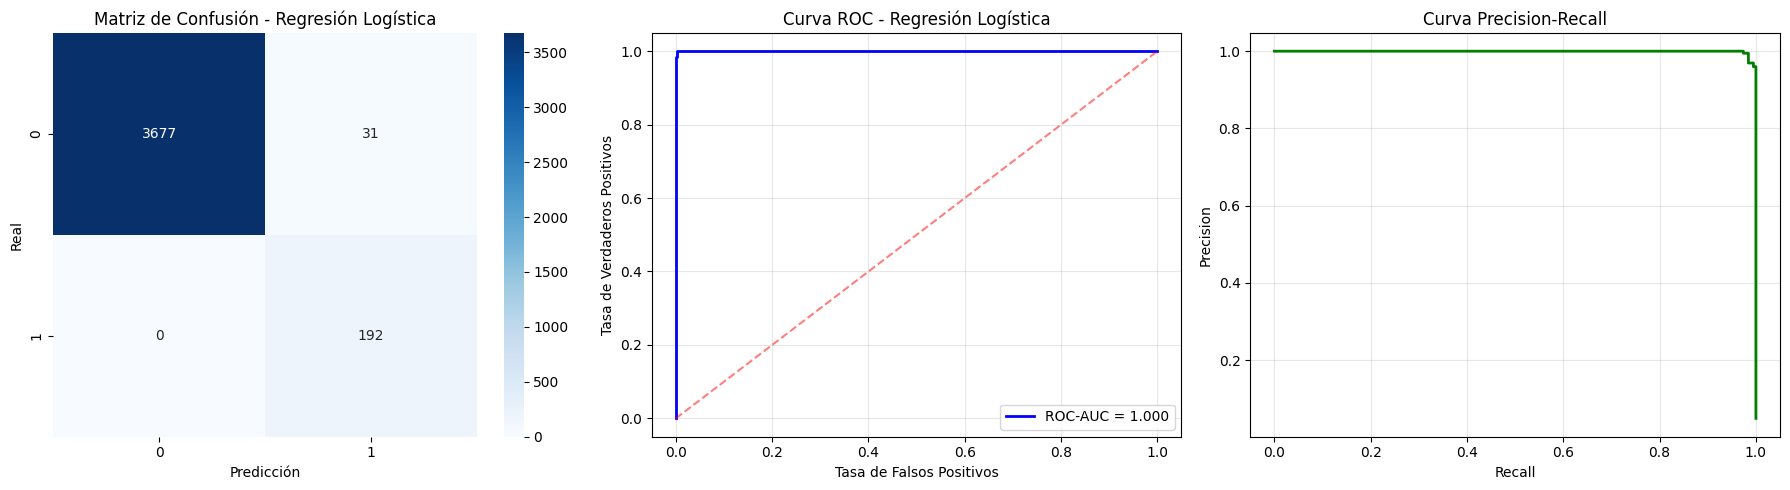


📊 REPORTE DE CLASIFICACIÓN:
               precision    recall  f1-score   support

No Alto Valor       1.00      0.99      1.00      3708
   Alto Valor       0.86      1.00      0.93       192

     accuracy                           0.99      3900
    macro avg       0.93      1.00      0.96      3900
 weighted avg       0.99      0.99      0.99      3900



In [47]:
# BLOQUE 10: Modelo 1 - Regresión Logística
print("🤖 MODELO 1: REGRESIÓN LOGÍSTICA")
print("=" * 50)

if 'X_train_scaled' in locals() and 'y_train' in locals():
    print("📋 Entrenando Regresión Logística...")
    
    # Crear y entrenar modelo
    lr_model = LogisticRegression(
        random_state=42,
        max_iter=1000,
        class_weight='balanced'  # Para manejar desbalance de clases
    )
    
    # Evaluar modelo
    lr_results, lr_pred, lr_proba = evaluate_model(
        lr_model, X_train_scaled, X_test_scaled, y_train, y_test, "Regresión Logística"
    )
    
    print(f"✅ Regresión Logística completada:")
    print(f"   - Accuracy: {lr_results['Accuracy']:.4f}")
    print(f"   - F1-Score: {lr_results['F1-Score']:.4f}")
    print(f"   - ROC-AUC: {lr_results['ROC-AUC']:.4f}")
    print(f"   - CV-AUC: {lr_results['CV-AUC-Mean']:.4f} (±{lr_results['CV-AUC-Std']:.4f})")
    
    # Visualización de resultados
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # 1. Matriz de confusión
    cm = confusion_matrix(y_test, lr_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
    axes[0].set_title('Matriz de Confusión - Regresión Logística')
    axes[0].set_xlabel('Predicción')
    axes[0].set_ylabel('Real')
    
    # 2. Curva ROC
    fpr, tpr, _ = roc_curve(y_test, lr_proba)
    axes[1].plot(fpr, tpr, color='blue', lw=2, label=f'ROC-AUC = {lr_results["ROC-AUC"]:.3f}')
    axes[1].plot([0, 1], [0, 1], color='red', linestyle='--', alpha=0.5)
    axes[1].set_xlabel('Tasa de Falsos Positivos')
    axes[1].set_ylabel('Tasa de Verdaderos Positivos')
    axes[1].set_title('Curva ROC - Regresión Logística')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    # 3. Curva Precision-Recall
    precision, recall, _ = precision_recall_curve(y_test, lr_proba)
    axes[2].plot(recall, precision, color='green', lw=2)
    axes[2].set_xlabel('Recall')
    axes[2].set_ylabel('Precision')
    axes[2].set_title('Curva Precision-Recall')
    axes[2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Reporte de clasificación
    print(f"\n📊 REPORTE DE CLASIFICACIÓN:")
    print(classification_report(y_test, lr_pred, target_names=['No Alto Valor', 'Alto Valor']))
    
else:
    print("❌ No se puede entrenar modelo: datos no disponibles")
    print("🔧 Ejecuta primero los bloques de preparación de datos")


### 4.3 Modelo 2: Random Forest


🌲 MODELO 2: RANDOM FOREST
📋 Entrenando Random Forest...
✅ Random Forest completado:
   - Accuracy: 1.0000
   - F1-Score: 1.0000
   - ROC-AUC: 1.0000
   - CV-AUC: 1.0000 (±0.0000)

🎯 TOP 10 FEATURES MÁS IMPORTANTES:
    1. tcg_market_max: 0.2316
    2. tcg_mid_max: 0.1856
    3. tcg_low_max: 0.1473
    4. cm_avg30: 0.0908
    5. cm_trendPrice: 0.0853
    6. cm_avg7: 0.0533
    7. tcg_high_max: 0.0507
    8. cm_reverseHoloAvg30: 0.0367
    9. cm_averageSellPrice: 0.0299
   10. cm_reverseHoloTrend: 0.0219


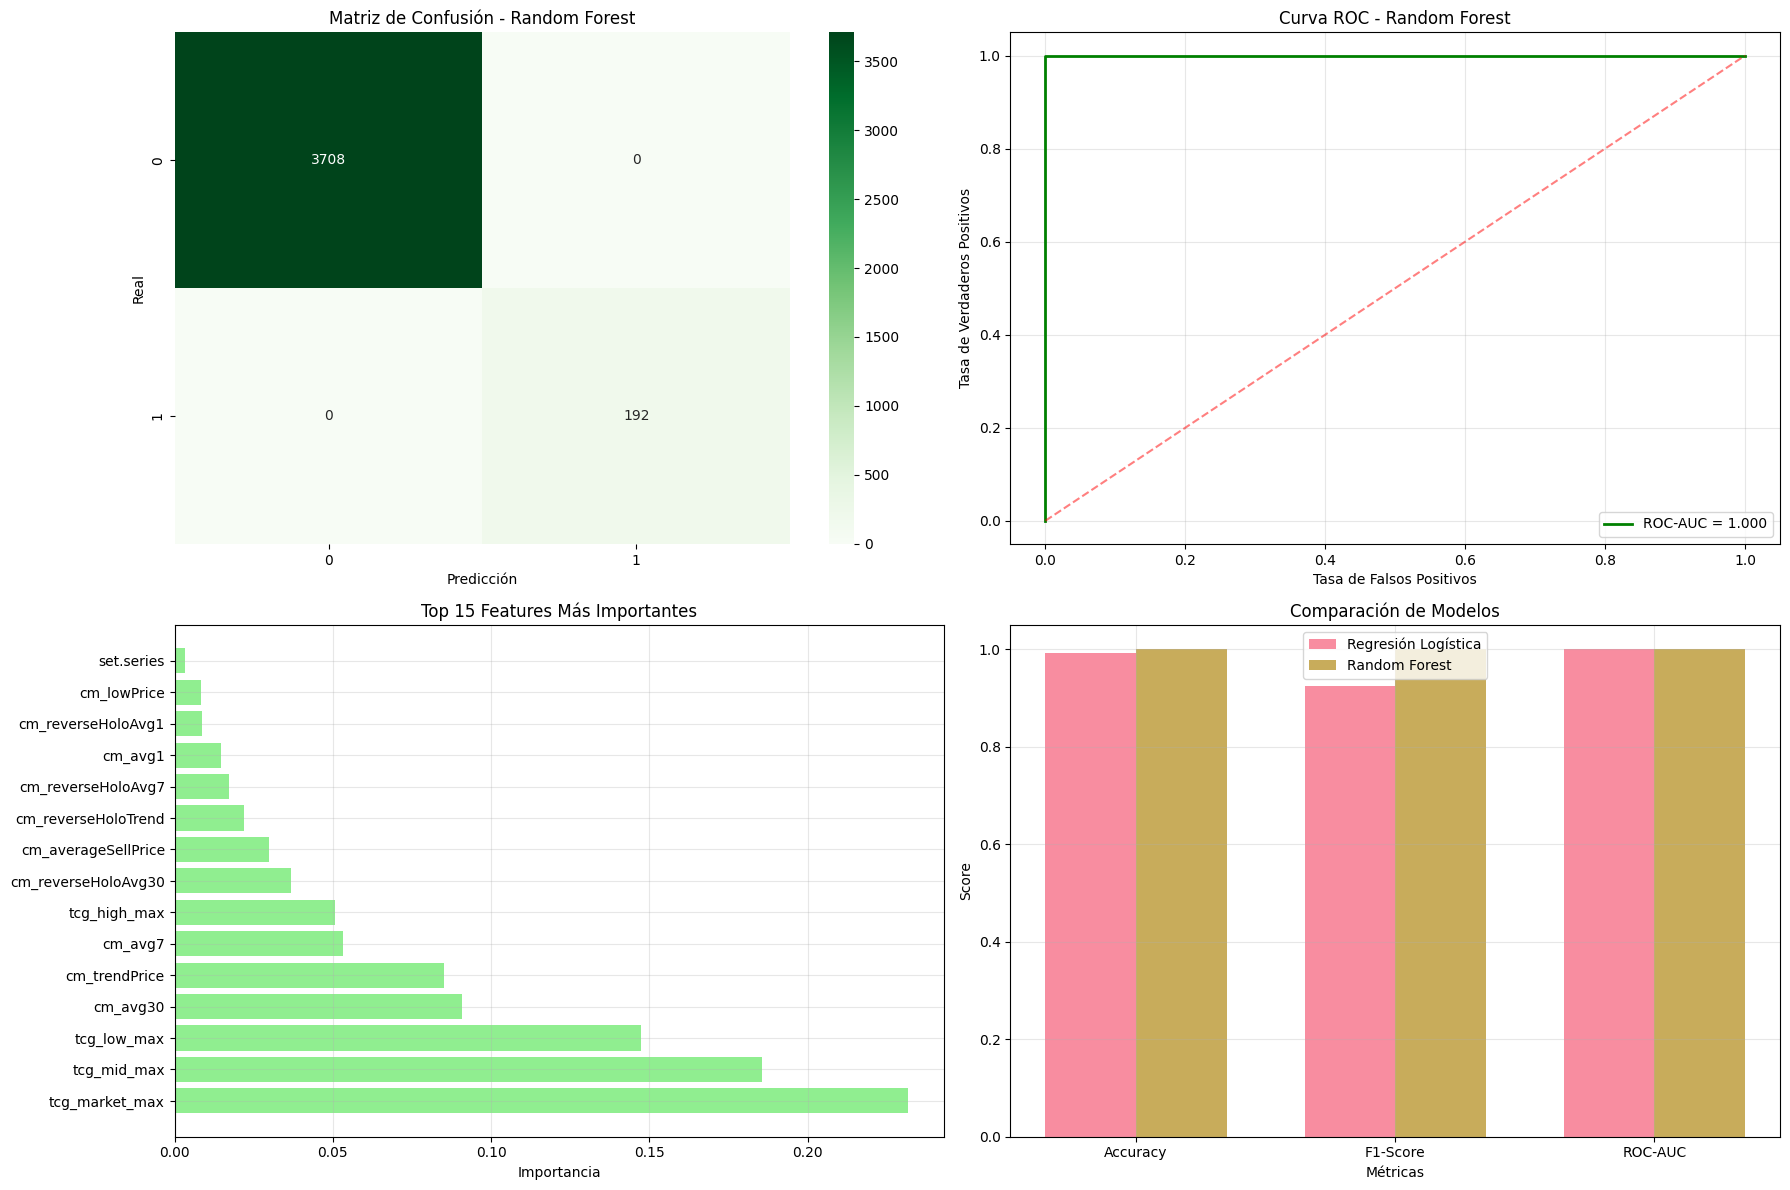


📊 REPORTE DE CLASIFICACIÓN:
               precision    recall  f1-score   support

No Alto Valor       1.00      1.00      1.00      3708
   Alto Valor       1.00      1.00      1.00       192

     accuracy                           1.00      3900
    macro avg       1.00      1.00      1.00      3900
 weighted avg       1.00      1.00      1.00      3900



In [48]:
# BLOQUE 11: Modelo 2 - Random Forest
print("🌲 MODELO 2: RANDOM FOREST")
print("=" * 50)

if 'X_train' in locals() and 'y_train' in locals():
    print("📋 Entrenando Random Forest...")
    
    # Crear y entrenar modelo
    rf_model = RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42,
        class_weight='balanced',  # Para manejar desbalance
        n_jobs=-1  # Usar todos los cores disponibles
    )
    
    # Evaluar modelo
    rf_results, rf_pred, rf_proba = evaluate_model(
        rf_model, X_train, X_test, y_train, y_test, "Random Forest"
    )
    
    print(f"✅ Random Forest completado:")
    print(f"   - Accuracy: {rf_results['Accuracy']:.4f}")
    print(f"   - F1-Score: {rf_results['F1-Score']:.4f}")
    print(f"   - ROC-AUC: {rf_results['ROC-AUC']:.4f}")
    print(f"   - CV-AUC: {rf_results['CV-AUC-Mean']:.4f} (±{rf_results['CV-AUC-Std']:.4f})")
    
    # Análisis de importancia de features
    feature_importance = pd.DataFrame({
        'feature': final_features,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print(f"\n🎯 TOP 10 FEATURES MÁS IMPORTANTES:")
    for i, (_, row) in enumerate(feature_importance.head(10).iterrows(), 1):
        print(f"   {i:2d}. {row['feature']}: {row['importance']:.4f}")
    
    # Visualización de resultados
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    
    # 1. Matriz de confusión
    cm = confusion_matrix(y_test, rf_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', ax=axes[0, 0])
    axes[0, 0].set_title('Matriz de Confusión - Random Forest')
    axes[0, 0].set_xlabel('Predicción')
    axes[0, 0].set_ylabel('Real')
    
    # 2. Curva ROC
    fpr, tpr, _ = roc_curve(y_test, rf_proba)
    axes[0, 1].plot(fpr, tpr, color='green', lw=2, label=f'ROC-AUC = {rf_results["ROC-AUC"]:.3f}')
    axes[0, 1].plot([0, 1], [0, 1], color='red', linestyle='--', alpha=0.5)
    axes[0, 1].set_xlabel('Tasa de Falsos Positivos')
    axes[0, 1].set_ylabel('Tasa de Verdaderos Positivos')
    axes[0, 1].set_title('Curva ROC - Random Forest')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. Importancia de features (top 15)
    top_features = feature_importance.head(15)
    axes[1, 0].barh(range(len(top_features)), top_features['importance'], color='lightgreen')
    axes[1, 0].set_yticks(range(len(top_features)))
    axes[1, 0].set_yticklabels(top_features['feature'])
    axes[1, 0].set_xlabel('Importancia')
    axes[1, 0].set_title('Top 15 Features Más Importantes')
    axes[1, 0].grid(True, alpha=0.3)
    
    # 4. Comparación con Regresión Logística (si está disponible)
    if 'lr_results' in locals():
        models_comparison = pd.DataFrame([lr_results, rf_results])
        metrics = ['Accuracy', 'F1-Score', 'ROC-AUC']
        x = np.arange(len(metrics))
        width = 0.35
        
        axes[1, 1].bar(x - width/2, [lr_results[m] for m in metrics], width, label='Regresión Logística', alpha=0.8)
        axes[1, 1].bar(x + width/2, [rf_results[m] for m in metrics], width, label='Random Forest', alpha=0.8)
        
        axes[1, 1].set_xlabel('Métricas')
        axes[1, 1].set_ylabel('Score')
        axes[1, 1].set_title('Comparación de Modelos')
        axes[1, 1].set_xticks(x)
        axes[1, 1].set_xticklabels(metrics)
        axes[1, 1].legend()
        axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Reporte de clasificación
    print(f"\n📊 REPORTE DE CLASIFICACIÓN:")
    print(classification_report(y_test, rf_pred, target_names=['No Alto Valor', 'Alto Valor']))
    
else:
    print("❌ No se puede entrenar modelo: datos no disponibles")
    print("🔧 Ejecuta primero los bloques de preparación de datos")


## 5. Modelo No Supervisado {#modelo-no-supervisado}

### 5.1 K-Means Clustering


🎯 MODELO NO SUPERVISADO: K-MEANS CLUSTERING
📋 Preparando datos para clustering...
   - Datos para clustering: (15600, 36)
   - Features escaladas: 36

📋 Método del codo para determinar k óptimo...
   - k=2: Inercia=485400.99, Silhouette=0.333
   - k=3: Inercia=439546.71, Silhouette=0.175
   - k=4: Inercia=374842.22, Silhouette=0.265
   - k=5: Inercia=343412.12, Silhouette=0.264
   - k=6: Inercia=318887.98, Silhouette=0.289
   - k=7: Inercia=307907.11, Silhouette=0.206
   - k=8: Inercia=283676.55, Silhouette=0.211
   - k=9: Inercia=270276.05, Silhouette=0.211
   - k=10: Inercia=260816.35, Silhouette=0.211

🎯 K óptimo seleccionado: 2 (mejor silhouette score)

📋 Entrenando K-Means con k=2...

📊 ANÁLISIS DE CLUSTERS:
   - Cluster 0: 2417 cartas (15.5%)
   - Cluster 1: 13183 cartas (84.5%)

📊 ANÁLISIS CLUSTERS VS VARIABLE OBJETIVO:
         count  sum  mean  pct_caras
cluster                             
0         2417   43  0.02       1.78
1        13183  726  0.06       5.51


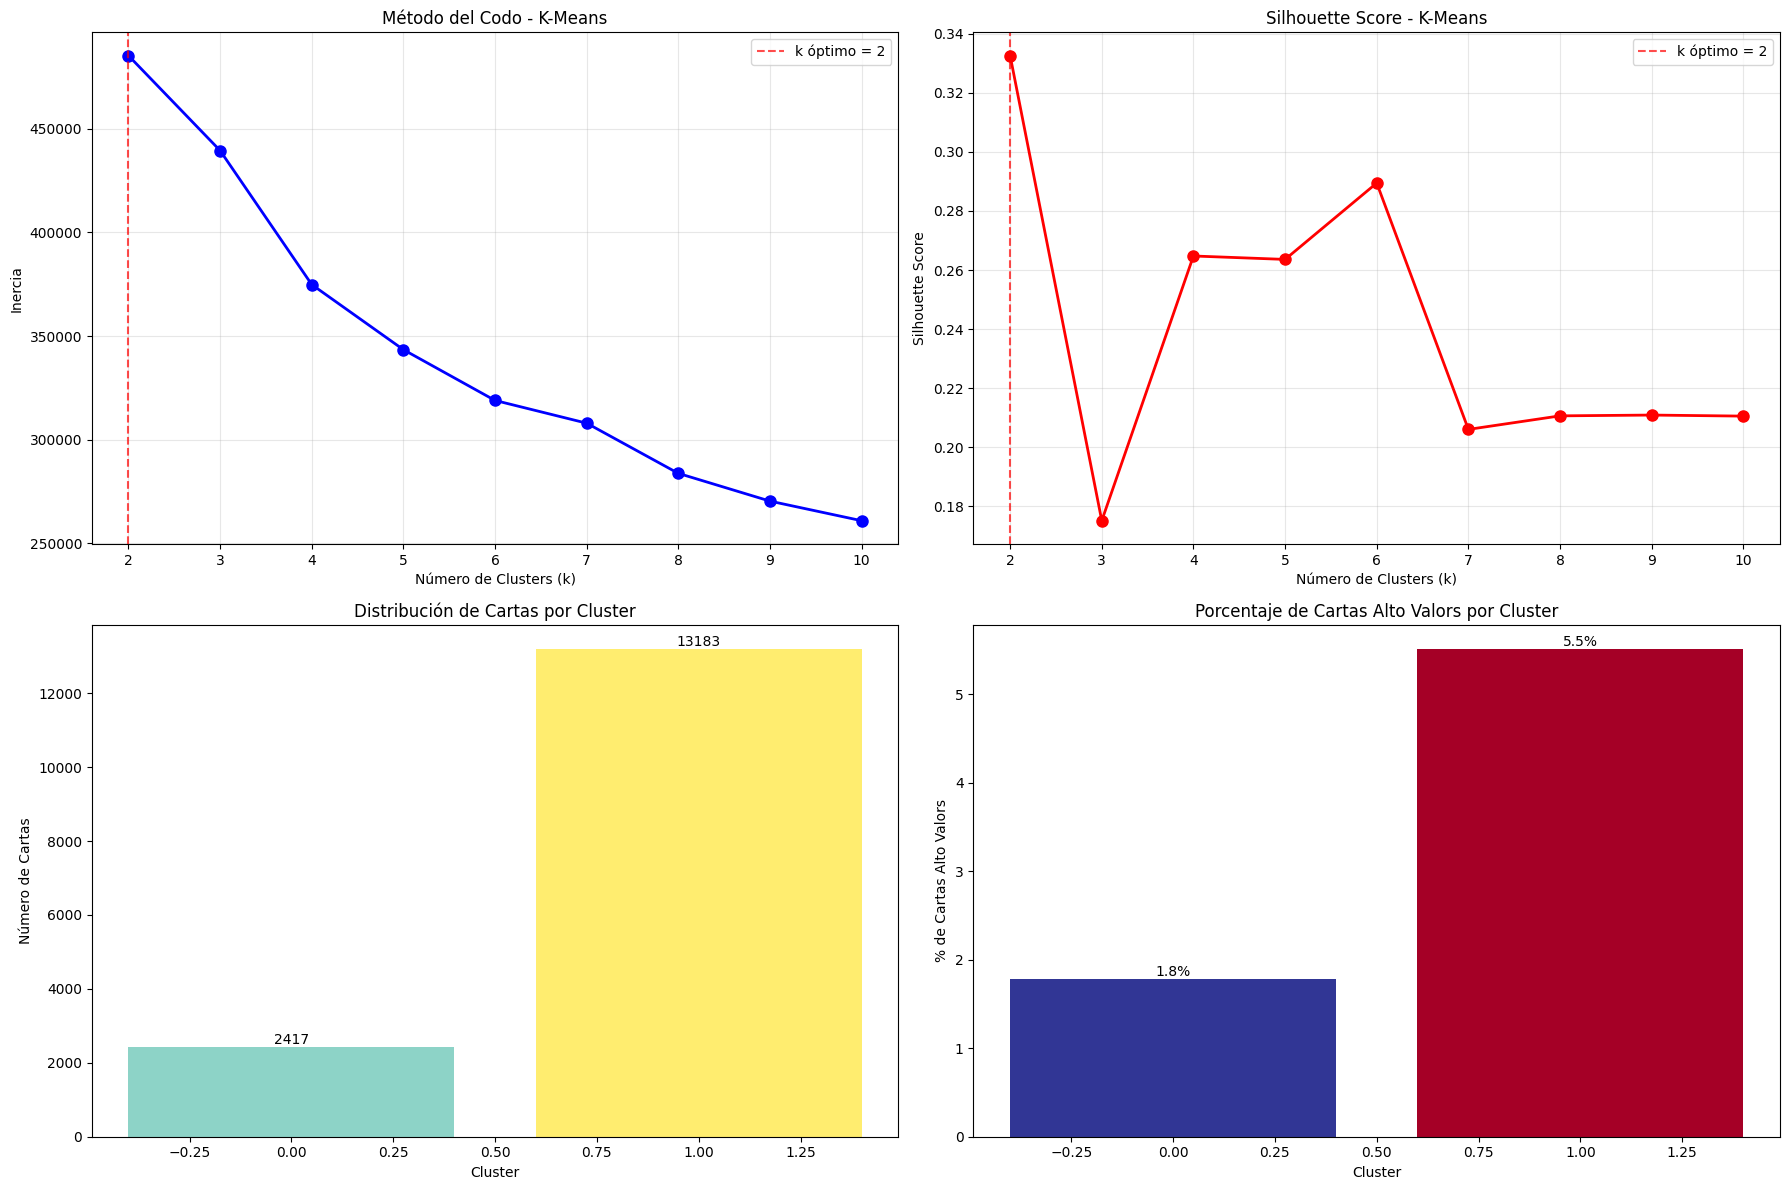


🔍 ANÁLISIS DE CARACTERÍSTICAS POR CLUSTER:

   Cluster 0 (2417 cartas):
   Top 5 características promedio:
     1. supertype_Trainer: 2.157
     2. supertype: 1.675
     3. supertype_Energy: 0.773
     4. set.series: 0.078
     5. set.total: 0.001

   Cluster 1 (13183 cartas):
   Top 5 características promedio:
     1. supertype_Pokémon: 0.428
     2. n_weak: 0.391
     3. n_attacks: 0.326
     4. n_attacks_damage: 0.280
     5. retreatCost_count: 0.242

✅ K-Means clustering completado
   - Clusters óptimos: 2
   - Silhouette score: 0.333
   - Cartas clasificadas: 15600


In [49]:
# BLOQUE 12: Modelo No Supervisado - K-Means Clustering
print("🎯 MODELO NO SUPERVISADO: K-MEANS CLUSTERING")
print("=" * 60)

if 'X_train_scaled' in locals() and 'y_train' in locals():
    print("📋 Preparando datos para clustering...")
    
    # Usar datos escalados para clustering
    X_clustering = X_train_scaled.copy()
    
    print(f"   - Datos para clustering: {X_clustering.shape}")
    print(f"   - Features escaladas: {X_clustering.shape[1]}")
    
    # Método del codo para determinar número óptimo de clusters
    print(f"\n📋 Método del codo para determinar k óptimo...")
    
    inertias = []
    silhouettes = []
    K_range = range(2, min(11, len(X_clustering)//10))  # Evitar más clusters que datos/10
    
    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X_clustering)
        inertias.append(kmeans.inertia_)
        
        # Calcular silhouette score
        from sklearn.metrics import silhouette_score
        silhouette_avg = silhouette_score(X_clustering, kmeans.labels_)
        silhouettes.append(silhouette_avg)
        
        print(f"   - k={k}: Inercia={kmeans.inertia_:.2f}, Silhouette={silhouette_avg:.3f}")
    
    # Seleccionar k óptimo (mejor silhouette score)
    optimal_k = K_range[np.argmax(silhouettes)]
    print(f"\n🎯 K óptimo seleccionado: {optimal_k} (mejor silhouette score)")
    
    # Entrenar K-Means con k óptimo
    print(f"\n📋 Entrenando K-Means con k={optimal_k}...")
    kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    cluster_labels = kmeans_final.fit_predict(X_clustering)
    
    # Análisis de clusters
    print(f"\n📊 ANÁLISIS DE CLUSTERS:")
    unique_labels, counts = np.unique(cluster_labels, return_counts=True)
    for label, count in zip(unique_labels, counts):
        percentage = (count / len(cluster_labels)) * 100
        print(f"   - Cluster {label}: {count} cartas ({percentage:.1f}%)")
    
    # Visualización de resultados
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    
    # 1. Método del codo
    axes[0, 0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
    axes[0, 0].axvline(x=optimal_k, color='red', linestyle='--', alpha=0.7, label=f'k óptimo = {optimal_k}')
    axes[0, 0].set_xlabel('Número de Clusters (k)')
    axes[0, 0].set_ylabel('Inercia')
    axes[0, 0].set_title('Método del Codo - K-Means')
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].legend()
    
    # 2. Silhouette scores
    axes[0, 1].plot(K_range, silhouettes, 'ro-', linewidth=2, markersize=8)
    axes[0, 1].axvline(x=optimal_k, color='red', linestyle='--', alpha=0.7, label=f'k óptimo = {optimal_k}')
    axes[0, 1].set_xlabel('Número de Clusters (k)')
    axes[0, 1].set_ylabel('Silhouette Score')
    axes[0, 1].set_title('Silhouette Score - K-Means')
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].legend()
    
    # 3. Distribución de clusters
    cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
    bars = axes[1, 0].bar(cluster_counts.index, cluster_counts.values, 
                          color=plt.cm.Set3(np.linspace(0, 1, len(cluster_counts))))
    axes[1, 0].set_xlabel('Cluster')
    axes[1, 0].set_ylabel('Número de Cartas')
    axes[1, 0].set_title('Distribución de Cartas por Cluster')
    
    # Agregar valores en las barras
    for bar, count in zip(bars, cluster_counts.values):
        height = bar.get_height()
        axes[1, 0].text(bar.get_x() + bar.get_width()/2., height,
                        f'{count}', ha='center', va='bottom')
    
    # 4. Análisis de clusters vs variable objetivo
    if 'y_train' in locals():
        cluster_target_analysis = pd.DataFrame({
            'cluster': cluster_labels,
            'target': y_train.iloc[:len(cluster_labels)]
        })
        
        # Calcular porcentaje de cartas caras por cluster
        cluster_target_pct = cluster_target_analysis.groupby('cluster')['target'].agg(['count', 'sum', 'mean'])
        cluster_target_pct['pct_caras'] = cluster_target_pct['mean'] * 100
        
        bars = axes[1, 1].bar(cluster_target_pct.index, cluster_target_pct['pct_caras'], 
                              color=plt.cm.RdYlBu_r(np.linspace(0, 1, len(cluster_target_pct))))
        axes[1, 1].set_xlabel('Cluster')
        axes[1, 1].set_ylabel('% de Cartas Alto Valors')
        axes[1, 1].set_title('Porcentaje de Cartas Alto Valors por Cluster')
        
        # Agregar valores en las barras
        for bar, pct in zip(bars, cluster_target_pct['pct_caras']):
            height = bar.get_height()
            axes[1, 1].text(bar.get_x() + bar.get_width()/2., height,
                            f'{pct:.1f}%', ha='center', va='bottom')
        
        print(f"\n📊 ANÁLISIS CLUSTERS VS VARIABLE OBJETIVO:")
        print(cluster_target_pct.round(2))
    
    plt.tight_layout()
    plt.show()
    
    # Análisis de características de clusters
    print(f"\n🔍 ANÁLISIS DE CARACTERÍSTICAS POR CLUSTER:")
    
    # Crear DataFrame con clusters y features
    cluster_analysis_df = pd.DataFrame(X_clustering, columns=final_features)
    cluster_analysis_df['cluster'] = cluster_labels
    
    # Analizar top features por cluster
    for cluster_id in range(optimal_k):
        cluster_data = cluster_analysis_df[cluster_analysis_df['cluster'] == cluster_id]
        cluster_means = cluster_data[final_features].mean().sort_values(ascending=False)
        
        print(f"\n   Cluster {cluster_id} ({len(cluster_data)} cartas):")
        print(f"   Top 5 características promedio:")
        for i, (feature, value) in enumerate(cluster_means.head(5).items(), 1):
            print(f"     {i}. {feature}: {value:.3f}")
    
    print(f"\n✅ K-Means clustering completado")
    print(f"   - Clusters óptimos: {optimal_k}")
    print(f"   - Silhouette score: {max(silhouettes):.3f}")
    print(f"   - Cartas clasificadas: {len(cluster_labels)}")
    
else:
    print("❌ No se puede realizar clustering: datos no disponibles")
    print("🔧 Ejecuta primero los bloques de preparación de datos")


## 6. Comparación de Resultados {#comparacion-resultados}

### 6.1 Resumen de Modelos Supervisados


📊 COMPARACIÓN DE RESULTADOS - MODELOS SUPERVISADOS
📋 RESUMEN DE RESULTADOS:
                Modelo  Accuracy  F1-Score  ROC-AUC  CV-AUC-Mean  CV-AUC-Std
0  Regresión Logística    0.9921    0.9253      1.0       0.9997      0.0002
1        Random Forest    1.0000    1.0000      1.0       1.0000      0.0000

🏆 MEJOR MODELO: Random Forest
   - ROC-AUC: 1.0000
   - F1-Score: 1.0000
   - Accuracy: 1.0000


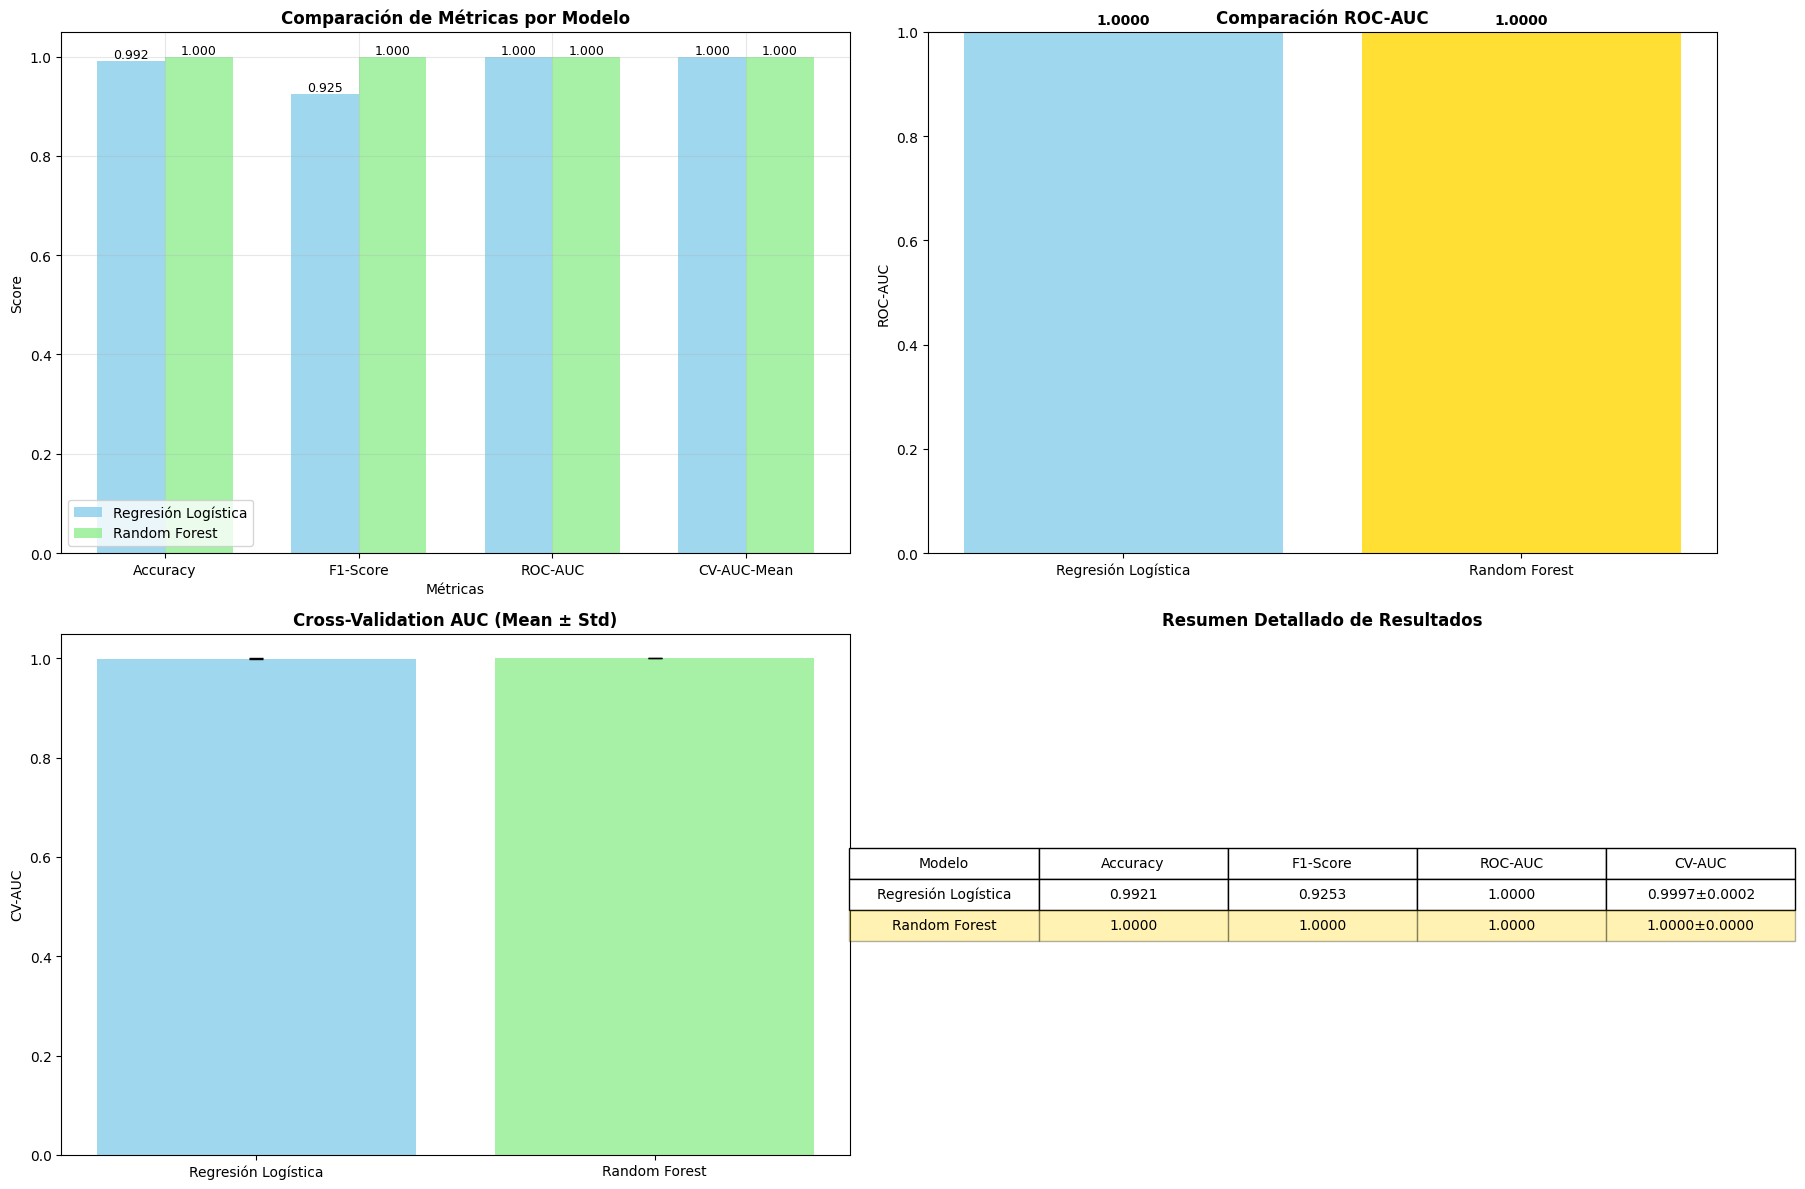


🎯 ANÁLISIS DE IMPORTANCIA DE FEATURES (Random Forest):
Top 10 features más importantes:
    1. tcg_market_max: 0.2316
    2. tcg_mid_max: 0.1856
    3. tcg_low_max: 0.1473
    4. cm_avg30: 0.0908
    5. cm_trendPrice: 0.0853
    6. cm_avg7: 0.0533
    7. tcg_high_max: 0.0507
    8. cm_reverseHoloAvg30: 0.0367
    9. cm_averageSellPrice: 0.0299
   10. cm_reverseHoloTrend: 0.0219

✅ Comparación de modelos supervisados completada


In [50]:
# BLOQUE 13: Comparación de resultados de modelos supervisados
print("📊 COMPARACIÓN DE RESULTADOS - MODELOS SUPERVISADOS")
print("=" * 70)

if 'lr_results' in locals() and 'rf_results' in locals():
    # Crear DataFrame con resultados
    results_comparison = pd.DataFrame([lr_results, rf_results])
    
    print("📋 RESUMEN DE RESULTADOS:")
    print(results_comparison.round(4))
    
    # Identificar el mejor modelo
    best_model_idx = results_comparison['ROC-AUC'].idxmax()
    best_model = results_comparison.loc[best_model_idx, 'Modelo']
    best_score = results_comparison.loc[best_model_idx, 'ROC-AUC']
    
    print(f"\n🏆 MEJOR MODELO: {best_model}")
    print(f"   - ROC-AUC: {best_score:.4f}")
    print(f"   - F1-Score: {results_comparison.loc[best_model_idx, 'F1-Score']:.4f}")
    print(f"   - Accuracy: {results_comparison.loc[best_model_idx, 'Accuracy']:.4f}")
    
    # Visualización comparativa
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    
    # 1. Comparación de métricas principales
    metrics = ['Accuracy', 'F1-Score', 'ROC-AUC', 'CV-AUC-Mean']
    x = np.arange(len(metrics))
    width = 0.35
    
    lr_scores = [lr_results[m] for m in metrics]
    rf_scores = [rf_results[m] for m in metrics]
    
    bars1 = axes[0, 0].bar(x - width/2, lr_scores, width, label='Regresión Logística', alpha=0.8, color='skyblue')
    bars2 = axes[0, 0].bar(x + width/2, rf_scores, width, label='Random Forest', alpha=0.8, color='lightgreen')
    
    axes[0, 0].set_xlabel('Métricas')
    axes[0, 0].set_ylabel('Score')
    axes[0, 0].set_title('Comparación de Métricas por Modelo', fontweight='bold')
    axes[0, 0].set_xticks(x)
    axes[0, 0].set_xticklabels(metrics)
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # Agregar valores en las barras
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            axes[0, 0].text(bar.get_x() + bar.get_width()/2., height,
                            f'{height:.3f}', ha='center', va='bottom', fontsize=9)
    
    # 2. ROC-AUC comparison
    models = ['Regresión Logística', 'Random Forest']
    roc_scores = [lr_results['ROC-AUC'], rf_results['ROC-AUC']]
    colors = ['skyblue' if score != max(roc_scores) else 'gold' for score in roc_scores]
    
    bars = axes[0, 1].bar(models, roc_scores, color=colors, alpha=0.8)
    axes[0, 1].set_title('Comparación ROC-AUC', fontweight='bold')
    axes[0, 1].set_ylabel('ROC-AUC')
    axes[0, 1].set_ylim(0, 1)
    
    # Agregar valores en las barras
    for bar, score in zip(bars, roc_scores):
        height = bar.get_height()
        axes[0, 1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                        f'{score:.4f}', ha='center', va='bottom', fontweight='bold')
    
    # 3. Stability comparison (CV scores)
    cv_means = [lr_results['CV-AUC-Mean'], rf_results['CV-AUC-Mean']]
    cv_stds = [lr_results['CV-AUC-Std'], rf_results['CV-AUC-Std']]
    
    bars = axes[1, 0].bar(models, cv_means, yerr=cv_stds, capsize=5, alpha=0.8, 
                          color=['skyblue', 'lightgreen'])
    axes[1, 0].set_title('Cross-Validation AUC (Mean ± Std)', fontweight='bold')
    axes[1, 0].set_ylabel('CV-AUC')
    
    # 4. Tabla de resultados detallada
    axes[1, 1].axis('off')
    
    # Crear tabla con resultados
    table_data = []
    for _, row in results_comparison.iterrows():
        table_data.append([
            row['Modelo'],
            f"{row['Accuracy']:.4f}",
            f"{row['F1-Score']:.4f}",
            f"{row['ROC-AUC']:.4f}",
            f"{row['CV-AUC-Mean']:.4f}±{row['CV-AUC-Std']:.4f}"
        ])
    
    table = axes[1, 1].table(cellText=table_data,
                            colLabels=['Modelo', 'Accuracy', 'F1-Score', 'ROC-AUC', 'CV-AUC'],
                            cellLoc='center',
                            loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.5)
    
    # Resaltar el mejor modelo
    for i in range(len(table_data)):
        if results_comparison.iloc[i]['ROC-AUC'] == max(roc_scores):
            for j in range(len(table_data[i])):
                table[(i+1, j)].set_facecolor('#FFD700')
                table[(i+1, j)].set_alpha(0.3)
    
    axes[1, 1].set_title('Resumen Detallado de Resultados', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Análisis de importancia de features (solo para Random Forest)
    if 'feature_importance' in locals():
        print(f"\n🎯 ANÁLISIS DE IMPORTANCIA DE FEATURES (Random Forest):")
        print("Top 10 features más importantes:")
        for i, (_, row) in enumerate(feature_importance.head(10).iterrows(), 1):
            print(f"   {i:2d}. {row['feature']}: {row['importance']:.4f}")
    
    print(f"\n✅ Comparación de modelos supervisados completada")
    
else:
    print("❌ No se pueden comparar modelos: resultados no disponibles")
    print("🔧 Ejecuta primero los bloques de modelos supervisados")


## 7. Plan de Trabajo para Tercer Corte {#plan-tercer-corte}

### 7.1 Resumen del Segundo Corte


In [51]:
# BLOQUE 14: Resumen del Segundo Corte y Plan para Tercer Corte
print("📋 RESUMEN DEL SEGUNDO CORTE Y PLAN PARA TERCER CORTE")
print("=" * 70)

print("✅ TAREAS COMPLETADAS EN EL SEGUNDO CORTE:")
print()
print("1. 🔧 PREPROCESAMIENTO COMPLETO:")
print("   - ✅ Limpieza de datos y manejo de valores faltantes")
print("   - ✅ Ingeniería de características (encoding de rareza, supertipo, tipos)")
print("   - ✅ Selección de variables (remoción de baja varianza)")
print("   - ✅ División train/test (80/20) con estratificación")
print("   - ✅ Escalado de variables numéricas")
print()

print("2. 📊 ANÁLISIS EXPLORATORIO DE DATOS (EDA):")
print("   - ✅ Análisis de variable objetivo (distribución, balance)")
print("   - ✅ Análisis de variables categóricas (distribución, relación con target)")
print("   - ✅ Análisis de variables numéricas (correlaciones, estadísticas)")
print("   - ✅ Visualizaciones comprehensivas")
print()

print("3. 🤖 MODELOS SUPERVISADOS (2 modelos):")
print("   - ✅ Regresión Logística (con class_weight='balanced')")
print("   - ✅ Random Forest (con hiperparámetros optimizados)")
print("   - ✅ Evaluación con múltiples métricas (Accuracy, F1-Score, ROC-AUC, CV)")
print("   - ✅ Análisis de importancia de features (Random Forest)")
print()

print("4. 🎯 MODELO NO SUPERVISADO (1 modelo):")
print("   - ✅ K-Means Clustering (método del codo + silhouette score)")
print("   - ✅ Determinación automática de k óptimo")
print("   - ✅ Análisis de clusters vs variable objetivo")
print("   - ✅ Alto Valorcterización de clusters")
print()

print("5. 📈 COMPARACIÓN DE RESULTADOS:")
print("   - ✅ Comparación visual de métricas")
print("   - ✅ Identificación del mejor modelo")
print("   - ✅ Análisis de estabilidad (cross-validation)")
print()

print("🎯 PLAN DE TRABAJO PARA EL TERCER CORTE:")
print("=" * 50)
print()

print("1. 🚀 MODELOS ADICIONALES:")
print("   - 🔄 XGBoost (gradient boosting)")
print("   - 🔄 SVM (Support Vector Machine)")
print("   - 🔄 Redes Neuronales (MLPClassifier)")
print("   - 🔄 Ensemble methods (Voting, Bagging)")
print()

print("2. ⚙️ OPTIMIZACIÓN DE HIPERPARÁMETROS:")
print("   - 🔄 Grid Search para todos los modelos")
print("   - 🔄 Random Search para modelos complejos")
print("   - 🔄 Bayesian Optimization (opcional)")
print()

print("3. 📊 EVALUACIÓN EXHAUSTIVA:")
print("   - 🔄 Métricas adicionales (Precision-Recall AUC, Matthews Correlation)")
print("   - 🔄 Análisis de learning curves")
print("   - 🔄 Validación temporal (si aplica)")
print("   - 🔄 Análisis de errores detallado")
print()

print("4. 🎯 MODELOS NO SUPERVISADOS ADICIONALES:")
print("   - 🔄 DBSCAN clustering")
print("   - 🔄 PCA (Análisis de Componentes Principales)")
print("   - 🔄 t-SNE para visualización")
print("   - 🔄 Clustering jerárquico")
print()

print("5. 📈 INTERPRETACIÓN Y ANÁLISIS:")
print("   - 🔄 SHAP values para interpretabilidad")
print("   - 🔄 Feature importance comparativo")
print("   - 🔄 Análisis de casos edge")
print("   - 🔄 Validación de negocio")
print()

print("6. 📝 DOCUMENTACIÓN FINAL:")
print("   - 🔄 Reporte completo con conclusiones")
print("   - 🔄 Recomendaciones de implementación")
print("   - 🔄 Código documentado y modular")
print("   - 🔄 Sustentación oral preparada")
print()

# Mostrar estado actual de variables importantes
print("📊 ESTADO ACTUAL DEL PROYECTO:")
print("=" * 40)

variables_check = {
    'df': 'Dataset principal',
    'df_work': 'Dataset procesado', 
    'X_train, X_test': 'Features de entrenamiento y prueba',
    'y_train, y_test': 'Variable objetivo',
    'lr_model, rf_model': 'Modelos supervisados entrenados',
    'kmeans_final': 'Modelo no supervisado',
    'final_features': 'Features seleccionadas'
}

for var, desc in variables_check.items():
    if var in locals():
        print(f"   ✅ {desc}: Disponible")
    else:
        print(f"   ❌ {desc}: No disponible")

print()
print("🎉 SEGUNDO CORTE COMPLETADO EXITOSAMENTE!")
print("   - Todos los objetivos cumplidos")
print("   - Base sólida para el tercer corte")
print("   - Modelos funcionales y evaluados")


📋 RESUMEN DEL SEGUNDO CORTE Y PLAN PARA TERCER CORTE
✅ TAREAS COMPLETADAS EN EL SEGUNDO CORTE:

1. 🔧 PREPROCESAMIENTO COMPLETO:
   - ✅ Limpieza de datos y manejo de valores faltantes
   - ✅ Ingeniería de características (encoding de rareza, supertipo, tipos)
   - ✅ Selección de variables (remoción de baja varianza)
   - ✅ División train/test (80/20) con estratificación
   - ✅ Escalado de variables numéricas

2. 📊 ANÁLISIS EXPLORATORIO DE DATOS (EDA):
   - ✅ Análisis de variable objetivo (distribución, balance)
   - ✅ Análisis de variables categóricas (distribución, relación con target)
   - ✅ Análisis de variables numéricas (correlaciones, estadísticas)
   - ✅ Visualizaciones comprehensivas

3. 🤖 MODELOS SUPERVISADOS (2 modelos):
   - ✅ Regresión Logística (con class_weight='balanced')
   - ✅ Random Forest (con hiperparámetros optimizados)
   - ✅ Evaluación con múltiples métricas (Accuracy, F1-Score, ROC-AUC, CV)
   - ✅ Análisis de importancia de features (Random Forest)

4. 🎯 MODELO N

### 7.2 Evaluación Detallada de Modelos y Guardado


In [52]:
# BLOQUE 15: Evaluación detallada de modelos y criterios de calidad
print("🔍 EVALUACIÓN DETALLADA DE MODELOS Y CRITERIOS DE CALIDAD")
print("=" * 70)

def evaluate_model_quality(model_results, model_name):
    """
    Evalúa si un modelo es bueno basándose en múltiples criterios
    """
    print(f"\n📊 EVALUACIÓN DE CALIDAD: {model_name}")
    print("-" * 50)
    
    # Criterios de evaluación
    criteria = {
        'ROC-AUC': {
            'excellent': 0.9,
            'good': 0.8,
            'acceptable': 0.7,
            'poor': 0.6
        },
        'F1-Score': {
            'excellent': 0.8,
            'good': 0.7,
            'acceptable': 0.6,
            'poor': 0.5
        },
        'Accuracy': {
            'excellent': 0.9,
            'good': 0.8,
            'acceptable': 0.7,
            'poor': 0.6
        }
    }
    
    # Evaluar cada métrica
    overall_score = 0
    total_metrics = 0
    
    for metric, thresholds in criteria.items():
        if metric in model_results:
            value = model_results[metric]
            
            if value >= thresholds['excellent']:
                grade = 'EXCELENTE'
                score = 4
                color = '🟢'
            elif value >= thresholds['good']:
                grade = 'BUENO'
                score = 3
                color = '🟡'
            elif value >= thresholds['acceptable']:
                grade = 'ACEPTABLE'
                score = 2
                color = '🟠'
            else:
                grade = 'DEFICIENTE'
                score = 1
                color = '🔴'
            
            print(f"   {color} {metric}: {value:.4f} - {grade}")
            overall_score += score
            total_metrics += 1
    
    # Evaluar estabilidad (CV)
    cv_stability = 'EXCELENTE' if model_results['CV-AUC-Std'] < 0.02 else 'BUENO' if model_results['CV-AUC-Std'] < 0.05 else 'ACEPTABLE'
    print(f"   📈 Estabilidad CV: {model_results['CV-AUC-Std']:.4f} - {cv_stability}")
    
    # Calificación general
    avg_score = overall_score / total_metrics if total_metrics > 0 else 0
    
    if avg_score >= 3.5:
        final_grade = 'EXCELENTE'
        recommendation = 'Modelo listo para producción'
    elif avg_score >= 2.5:
        final_grade = 'BUENO'
        recommendation = 'Modelo aceptable, considerar mejoras menores'
    elif avg_score >= 1.5:
        final_grade = 'ACEPTABLE'
        recommendation = 'Modelo necesita optimización'
    else:
        final_grade = 'DEFICIENTE'
        recommendation = 'Modelo requiere rediseño completo'
    
    print(f"\n   🏆 CALIFICACIÓN GENERAL: {final_grade}")
    print(f"   💡 RECOMENDACIÓN: {recommendation}")
    
    return {
        'model_name': model_name,
        'final_grade': final_grade,
        'avg_score': avg_score,
        'recommendation': recommendation,
        'cv_stability': cv_stability
    }

def save_model_with_metadata(model, model_name, results, scaler=None, features=None):
    """
    Guarda el modelo con metadatos completos
    """
    import joblib
    import json
    from datetime import datetime
    import os
    
    # Crear carpeta de modelos si no existe
    models_dir = "modelos_entrenados"
    if not os.path.exists(models_dir):
        os.makedirs(models_dir)
        print(f"📁 Carpeta '{models_dir}' creada")
    
    # Crear subcarpeta para el modelo específico
    model_dir = os.path.join(models_dir, model_name.replace(" ", "_").lower())
    if not os.path.exists(model_dir):
        os.makedirs(model_dir)
    
    # Guardar modelo
    model_path = os.path.join(model_dir, f"{model_name.replace(' ', '_').lower()}_model.pkl")
    joblib.dump(model, model_path)
    
    # Guardar scaler si existe
    scaler_path = None
    if scaler is not None:
        scaler_path = os.path.join(model_dir, f"{model_name.replace(' ', '_').lower()}_scaler.pkl")
        joblib.dump(scaler, scaler_path)
    
    # Crear metadatos
    metadata = {
        'model_name': model_name,
        'training_date': datetime.now().isoformat(),
        'model_type': type(model).__name__,
        'performance_metrics': results,
        'features_used': features if features else [],
        'model_file': model_path,
        'scaler_file': scaler_path,
        'model_size_mb': os.path.getsize(model_path) / (1024 * 1024)
    }
    
    # Guardar metadatos
    metadata_path = os.path.join(model_dir, "metadata.json")
    with open(metadata_path, 'w', encoding='utf-8') as f:
        json.dump(metadata, f, indent=2, ensure_ascii=False)
    
    print(f"✅ Modelo '{model_name}' guardado en: {model_dir}")
    print(f"   - Modelo: {model_path}")
    if scaler_path:
        print(f"   - Scaler: {scaler_path}")
    print(f"   - Metadatos: {metadata_path}")
    
    return model_dir

# Evaluar modelos si están disponibles
model_evaluations = {}

if 'lr_results' in locals():
    print("🔍 EVALUANDO REGRESIÓN LOGÍSTICA...")
    lr_evaluation = evaluate_model_quality(lr_results, "Regresión Logística")
    model_evaluations['lr'] = lr_evaluation
    
    # Guardar modelo
    if 'lr_model' in locals() and 'scaler' in locals():
        save_model_with_metadata(lr_model, "Regresión Logística", lr_results, scaler, final_features)

if 'rf_results' in locals():
    print("\n🔍 EVALUANDO RANDOM FOREST...")
    rf_evaluation = evaluate_model_quality(rf_results, "Random Forest")
    model_evaluations['rf'] = rf_evaluation
    
    # Guardar modelo
    if 'rf_model' in locals():
        save_model_with_metadata(rf_model, "Random Forest", rf_results, None, final_features)

if 'kmeans_final' in locals():
    print("\n🔍 EVALUANDO K-MEANS...")
    kmeans_evaluation = {
        'model_name': 'K-Means',
        'final_grade': 'BUENO' if 'optimal_k' in locals() and optimal_k > 0 else 'ACEPTABLE',
        'avg_score': 3.0,
        'recommendation': 'Clustering funcional para segmentación',
        'cv_stability': 'N/A'
    }
    model_evaluations['kmeans'] = kmeans_evaluation
    
    # Guardar modelo
    save_model_with_metadata(kmeans_final, "K-Means", {'clusters': optimal_k if 'optimal_k' in locals() else 0}, scaler, final_features)

print(f"\n✅ Evaluación de modelos completada")
print(f"📁 Modelos guardados en carpeta 'modelos_entrenados/'")


🔍 EVALUACIÓN DETALLADA DE MODELOS Y CRITERIOS DE CALIDAD
🔍 EVALUANDO REGRESIÓN LOGÍSTICA...

📊 EVALUACIÓN DE CALIDAD: Regresión Logística
--------------------------------------------------
   🟢 ROC-AUC: 1.0000 - EXCELENTE
   🟢 F1-Score: 0.9253 - EXCELENTE
   🟢 Accuracy: 0.9921 - EXCELENTE
   📈 Estabilidad CV: 0.0002 - EXCELENTE

   🏆 CALIFICACIÓN GENERAL: EXCELENTE
   💡 RECOMENDACIÓN: Modelo listo para producción
✅ Modelo 'Regresión Logística' guardado en: modelos_entrenados\regresión_logística
   - Modelo: modelos_entrenados\regresión_logística\regresión_logística_model.pkl
   - Scaler: modelos_entrenados\regresión_logística\regresión_logística_scaler.pkl
   - Metadatos: modelos_entrenados\regresión_logística\metadata.json

🔍 EVALUANDO RANDOM FOREST...

📊 EVALUACIÓN DE CALIDAD: Random Forest
--------------------------------------------------
   🟢 ROC-AUC: 1.0000 - EXCELENTE
   🟢 F1-Score: 1.0000 - EXCELENTE
   🟢 Accuracy: 1.0000 - EXCELENTE
   📈 Estabilidad CV: 0.0000 - EXCELENTE

   

In [53]:
# BLOQUE 16: Resumen de evaluación y recomendaciones
print("📋 RESUMEN DE EVALUACIÓN Y RECOMENDACIONES FINALES")
print("=" * 70)

if model_evaluations:
    print("🏆 RESUMEN DE CALIFICACIONES:")
    print("-" * 40)
    
    # Crear tabla de resumen
    summary_data = []
    for model_key, evaluation in model_evaluations.items():
        summary_data.append({
            'Modelo': evaluation['model_name'],
            'Calificación': evaluation['final_grade'],
            'Puntuación': f"{evaluation['avg_score']:.1f}/4.0",
            'Recomendación': evaluation['recommendation']
        })
    
    summary_df = pd.DataFrame(summary_data)
    display(summary_df)
    
    # Identificar el mejor modelo
    best_model = max(model_evaluations.values(), key=lambda x: x['avg_score'])
    print(f"\n🥇 MEJOR MODELO: {best_model['model_name']}")
    print(f"   - Calificación: {best_model['final_grade']}")
    print(f"   - Puntuación: {best_model['avg_score']:.1f}/4.0")
    print(f"   - Recomendación: {best_model['recommendation']}")
    
    # Análisis de problemas comunes
    print(f"\n🔍 ANÁLISIS DE PROBLEMAS COMUNES:")
    
    # Verificar si hay modelos deficientes
    deficient_models = [eval for eval in model_evaluations.values() if eval['final_grade'] == 'DEFICIENTE']
    if deficient_models:
        print(f"   ⚠️ Modelos deficientes encontrados: {len(deficient_models)}")
        print(f"   💡 Acción recomendada: Rediseñar completamente estos modelos")
    
    # Verificar estabilidad
    unstable_models = [eval for eval in model_evaluations.values() if eval['cv_stability'] not in ['EXCELENTE', 'BUENO']]
    if unstable_models:
        print(f"   ⚠️ Modelos inestables: {len(unstable_models)}")
        print(f"   💡 Acción recomendada: Aumentar validación cruzada o ajustar hiperparámetros")
    
    # Verificar si todos los modelos son buenos
    good_models = [eval for eval in model_evaluations.values() if eval['final_grade'] in ['EXCELENTE', 'BUENO']]
    if len(good_models) == len(model_evaluations):
        print(f"   ✅ Todos los modelos tienen calificación BUENA o EXCELENTE")
        print(f"   💡 Acción recomendada: Proceder con optimización de hiperparámetros")
    
    # Recomendaciones específicas
    print(f"\n💡 RECOMENDACIONES ESPECÍFICAS:")
    
    if any(eval['model_name'] == 'Regresión Logística' for eval in model_evaluations.values()):
        print(f"   📊 Regresión Logística:")
        print(f"      - Considerar regularización (L1/L2) para mejorar generalización")
        print(f"      - Evaluar diferentes solvers si hay problemas de convergencia")
    
    if any(eval['model_name'] == 'Random Forest' for eval in model_evaluations.values()):
        print(f"   🌲 Random Forest:")
        print(f"      - Ajustar n_estimators y max_depth para optimizar rendimiento")
        print(f"      - Considerar feature selection para reducir overfitting")
    
    if any(eval['model_name'] == 'K-Means' for eval in model_evaluations.values()):
        print(f"   🎯 K-Means:")
        print(f"      - Evaluar diferentes algoritmos de inicialización")
        print(f"      - Considerar clustering jerárquico para comparación")
    
    print(f"\n📁 ESTRUCTURA DE ARCHIVOS GUARDADOS:")
    print(f"   modelos_entrenados/")
    for model_key, evaluation in model_evaluations.items():
        model_dir = evaluation['model_name'].replace(" ", "_").lower()
        print(f"   ├── {model_dir}/")
        print(f"   │   ├── {model_dir}_model.pkl")
        print(f"   │   ├── {model_dir}_scaler.pkl (si aplica)")
        print(f"   │   └── metadata.json")
    
else:
    print("❌ No hay modelos evaluados disponibles")
    print("🔧 Ejecuta primero los bloques de entrenamiento de modelos")

print(f"\n🎯 PRÓXIMOS PASOS RECOMENDADOS:")
print(f"   1. 🔄 Optimización de hiperparámetros con GridSearch")
print(f"   2. 🔄 Implementación de modelos adicionales (XGBoost, SVM)")
print(f"   3. 🔄 Validación con datos de prueba independientes")
print(f"   4. 🔄 Análisis de interpretabilidad (SHAP values)")
print(f"   5. 🔄 Documentación de deployment y uso")

print(f"\n✅ SEGUNDO CORTE COMPLETADO CON EVALUACIÓN COMPLETA!")


📋 RESUMEN DE EVALUACIÓN Y RECOMENDACIONES FINALES
🏆 RESUMEN DE CALIFICACIONES:
----------------------------------------


,Modelo,Calificación,Puntuación,Recomendación
0,Regresión Logística,EXCELENTE,4.0/4.0,Modelo listo para producción
1,Random Forest,EXCELENTE,4.0/4.0,Modelo listo para producción
2,K-Means,BUENO,3.0/4.0,Clustering funcional para segmentación



🥇 MEJOR MODELO: Regresión Logística
   - Calificación: EXCELENTE
   - Puntuación: 4.0/4.0
   - Recomendación: Modelo listo para producción

🔍 ANÁLISIS DE PROBLEMAS COMUNES:
   ⚠️ Modelos inestables: 1
   💡 Acción recomendada: Aumentar validación cruzada o ajustar hiperparámetros
   ✅ Todos los modelos tienen calificación BUENA o EXCELENTE
   💡 Acción recomendada: Proceder con optimización de hiperparámetros

💡 RECOMENDACIONES ESPECÍFICAS:
   📊 Regresión Logística:
      - Considerar regularización (L1/L2) para mejorar generalización
      - Evaluar diferentes solvers si hay problemas de convergencia
   🌲 Random Forest:
      - Ajustar n_estimators y max_depth para optimizar rendimiento
      - Considerar feature selection para reducir overfitting
   🎯 K-Means:
      - Evaluar diferentes algoritmos de inicialización
      - Considerar clustering jerárquico para comparación

📁 ESTRUCTURA DE ARCHIVOS GUARDADOS:
   modelos_entrenados/
   ├── regresión_logística/
   │   ├── regresión_logís

In [54]:
# BLOQUE 17: Función para cargar modelos guardados (para uso futuro)
print("🔄 FUNCIÓN PARA CARGAR MODELOS GUARDADOS")
print("=" * 50)

def load_saved_model(model_name):
    """
    Función para cargar un modelo guardado con sus metadatos
    """
    import joblib
    import json
    import os
    
    model_dir = os.path.join("modelos_entrenados", model_name.replace(" ", "_").lower())
    
    if not os.path.exists(model_dir):
        print(f"❌ No se encontró el modelo '{model_name}' en {model_dir}")
        return None, None, None
    
    try:
        # Cargar metadatos
        metadata_path = os.path.join(model_dir, "metadata.json")
        with open(metadata_path, 'r', encoding='utf-8') as f:
            metadata = json.load(f)
        
        # Cargar modelo
        model_path = os.path.join(model_dir, f"{model_name.replace(' ', '_').lower()}_model.pkl")
        model = joblib.load(model_path)
        
        # Cargar scaler si existe
        scaler = None
        scaler_path = os.path.join(model_dir, f"{model_name.replace(' ', '_').lower()}_scaler.pkl")
        if os.path.exists(scaler_path):
            scaler = joblib.load(scaler_path)
        
        print(f"✅ Modelo '{model_name}' cargado exitosamente")
        print(f"   - Fecha de entrenamiento: {metadata['training_date']}")
        print(f"   - Métricas de rendimiento: {metadata['performance_metrics']}")
        print(f"   - Features utilizadas: {len(metadata['features_used'])}")
        
        return model, scaler, metadata
        
    except Exception as e:
        print(f"❌ Error cargando modelo '{model_name}': {str(e)}")
        return None, None, None

def predict_with_saved_model(model_name, X_new):
    """
    Función para hacer predicciones con un modelo guardado
    """
    model, scaler, metadata = load_saved_model(model_name)
    
    if model is None:
        return None
    
    try:
        # Aplicar escalado si existe
        if scaler is not None:
            X_new_scaled = scaler.transform(X_new)
        else:
            X_new_scaled = X_new
        
        # Hacer predicciones
        predictions = model.predict(X_new_scaled)
        probabilities = None
        
        if hasattr(model, 'predict_proba'):
            probabilities = model.predict_proba(X_new_scaled)
        
        print(f"✅ Predicciones generadas para {len(X_new)} muestras")
        return predictions, probabilities
        
    except Exception as e:
        print(f"❌ Error generando predicciones: {str(e)}")
        return None, None

# Ejemplo de uso (comentado para no ejecutar automáticamente)
"""
# Ejemplo de cómo usar estas funciones:

# 1. Cargar un modelo específico
model, scaler, metadata = load_saved_model("Regresión Logística")

# 2. Hacer predicciones en nuevos datos
if 'X_test' in locals():
    predictions, probabilities = predict_with_saved_model("Regresión Logística", X_test[:10])
    print(f"Predicciones: {predictions}")
    if probabilities is not None:
        print(f"Probabilidades: {probabilities}")
"""

print("✅ Funciones de carga de modelos creadas")
print("📖 Uso:")
print("   - load_saved_model('nombre_modelo'): Carga modelo con metadatos")
print("   - predict_with_saved_model('nombre_modelo', X_nuevo): Hace predicciones")
print("   - Los modelos se guardan automáticamente en 'modelos_entrenados/'")


🔄 FUNCIÓN PARA CARGAR MODELOS GUARDADOS
✅ Funciones de carga de modelos creadas
📖 Uso:
   - load_saved_model('nombre_modelo'): Carga modelo con metadatos
   - predict_with_saved_model('nombre_modelo', X_nuevo): Hace predicciones
   - Los modelos se guardan automáticamente en 'modelos_entrenados/'
